Tim mode pesawat
1. Evans Kizito

2. Muhammad Binar Raffi Lazuardi

3. Muhammad Raffy Zeidan

# ATTENTION

UNTUK MEMVALIDASI MODEL SILAKAN LANGSUNG KE BAGIAN VALIDASI MODEL (BAGIAN AKHIR NOTEBOOK) KODE HANYA MENULISKAN ALUR STRATEGI, BUKAN PIPELINE YANG DI RUNNING DARI AWAL, MODEL SUDAH DI DOWNLOAD DAN DAPAT DIAMBIL DENGAN MENDOWNLOAD ZIP PADA BAGAIAN ```-> -> -> VALIDASI MODEL <- <- <-```

# PENDAHULUAN

Indonesia tengah memasuki fase penting menuju Visi Indonesia Emas 2045, di mana digitalisasi menjadi motor utama untuk mewujudkan masyarakat inovatif, produktif, dan sejahtera. Pasca pelantikan Presiden Prabowo Subianto dan Wakil Presiden Gibran Rakabuming Raka pada Oktober 2024, ruang digital—khususnya media sosial X—menjadi arena diskursus publik mengenai arah pembangunan nasional.

Dalam konteks ini, Astacita hadir sebagai cetak biru pembangunan yang mencakup delapan pilar strategis, mulai dari ideologi, pertahanan, hingga harmoni sosial-budaya. Media sosial berperan penting bukan hanya sebagai kanal informasi, tetapi juga sebagai refleksi aspirasi masyarakat terkait implementasi Astacita dan Tujuan Pembangunan Berkelanjutan (SDGs).

Diponegoro Data Science Competition (DDSC) 2025 menantang peserta untuk membangun sistem klasifikasi otomatis yang mampu memetakan tweet ke dalam delapan pilar Astacita. Tantangan ini tidak hanya menekankan akurasi teknis, tetapi juga membuka peluang untuk memahami aspirasi rakyat, menelusuri peran digitalisasi, serta memberikan kontribusi pada desain kebijakan menuju masa depan Indonesia

# IMPORT AND SETUP

In [ ]:
print("⚙️ Menginstal library yang dibutuhkan...")
!pip install -q Sastrawi
!pip install -q transformers
!pip install -q datasets
print("✅ Library tambahan berhasil diinstal.")

# Mengimpor semua "alat" yang akan kita gunakan di awal.

print("\n📦 Mengimpor semua library...")

# Untuk manipulasi data
import pandas as pd
import numpy as np
import re

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk NLP dan modeling dari Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Untuk evaluasi model (METRIK UTAMA ADA DI SINI)
from sklearn.metrics import balanced_accuracy_score, classification_report, ConfusionMatrixDisplay

# Untuk pra-pemrosesan teks Bahasa Indonesia (Stemming)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

print("✅ Semua library dasar berhasil diimpor.")

# Mengatur tampilan agar lebih informatif

# Mengatur gaya plot visualisasi agar lebih menarik
sns.set_style('whitegrid')

# Mengatur agar Pandas menampilkan teks yang lebih panjang (berguna untuk melihat tweet)
pd.set_option('display.max_colwidth', 150)

⚙️ Menginstal library yang dibutuhkan...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.9 MB/s eta 0:00:00
✅ Library tambahan berhasil diinstal.

📦 Mengimpor semua library...
✅ Semua library dasar berhasil diimpor.


In [ ]:
# Train Original: https://drive.google.com/file/d/1uaQxaaF9SsF56pTodnNTLb4AQyPXcQam/view?usp=drive_link
df_train = pd.read_csv('https://drive.google.com/uc?export=download&id=1uaQxaaF9SsF56pTodnNTLb4AQyPXcQam')

# Test: https://drive.google.com/file/d/1zpmpdLFmI7dS_jzRSlhIzXTazh4J9zXJ/view?usp=drive_link
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1zpmpdLFmI7dS_jzRSlhIzXTazh4J9zXJ')

# Reproducibility
SEED = 42

In [ ]:
train.drop_duplicates(inplace=True)

/tmp/ipython-input-2314313266.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


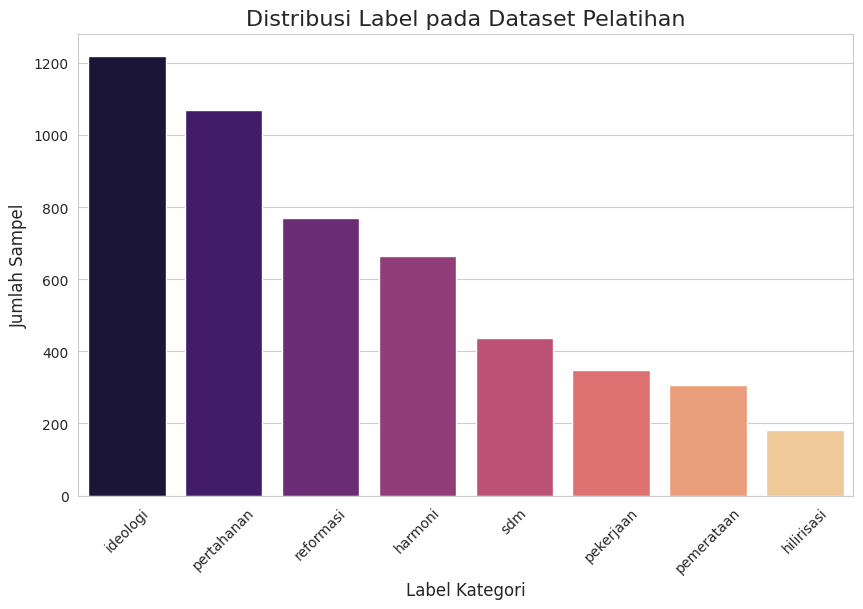

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✨ Atur gaya visualisasi
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.countplot(
    x=df_train['label'],
    order=df_train['label'].value_counts().index,
    palette='magma'
)
plt.title('Distribusi Label pada Dataset Pelatihan', fontsize=16)
plt.xlabel('Label Kategori', fontsize=12)
plt.ylabel('Jumlah Sampel', fontsize=12)
plt.xticks(rotation=45)  # ✨ tambahk=an rotasi agar label terbaca jika panjang
plt.show()


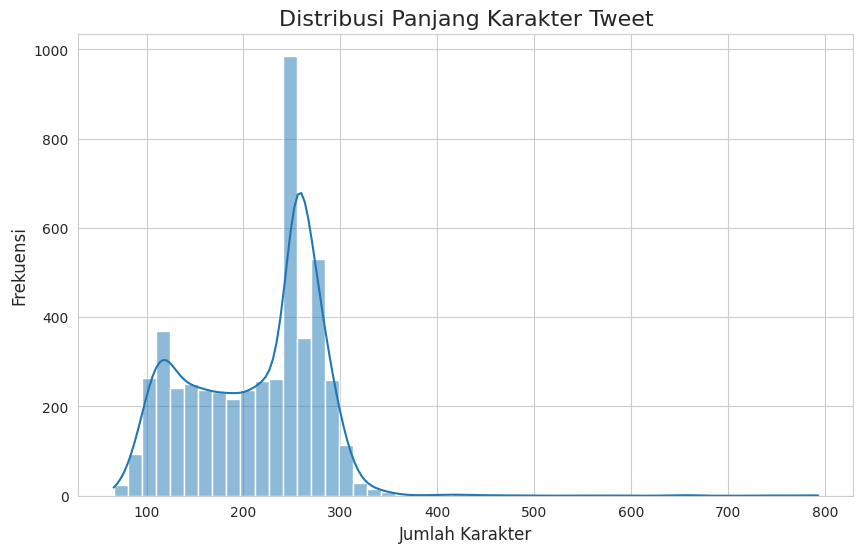

In [ ]:
df_train['panjang_tweet'] = df_train['text'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(df_train['panjang_tweet'], bins=50, kde=True)
plt.title('Distribusi Panjang Karakter Tweet', fontsize=16)
plt.xlabel('Jumlah Karakter', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

In [ ]:
# ==============================================================================
# 3. ANALISIS KATA KUNCI PER KATEGORI (WORD CLOUD)
# ==============================================================================

# 1. Instalasi Library (jika belum)
# ------------------------------------------------------------------------------
print("⚙️ Menginstal library yang dibutuhkan...")
!pip install -q wordcloud
!pip install -q Sastrawi

import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# 2. Muat Data dan Siapkan Stopwords
# ------------------------------------------------------------------------------
print("\n🔄 Memuat data dan menyiapkan stopwords...")
df_train = pd.read_csv('train.csv')

# Daftar stopwords yang Anda berikan
factory = StopWordRemoverFactory()
sastrawi_stopwords = factory.get_stop_words()
custom_stopwords = [
    'yg', 'ga', 'gak', 'enggak', 'nya', 'sih', 'kok', 'aja', 'yaa', 'ya', 'biar',
    'gini', 'gitu', 'kalo', 'klo', 'dah', 'deh', 'tuh', 'udh', 'udah', 'kak',
    'min', 'bro', 'sis', 'jg', 'juga', 'aja', 'sama', 'bisa', 'jadi', 'buat',
    'tp', 'tapi', 'ada', 'ini', 'itu', 'atau', 'akan', 'ke', 'ini', 'itu',
    'dengan', 'untuk', 'pada', 'jika', 'seperti', 'karena', 'lebih', 'mau',
    'masih','utk','krn', 'cuma','jd','bgt','lah','ata','gw','kayak','apa','jangan',
    'https','co','t', 'rt' # 'rt' sering muncul dari retweet
]
# Gabungkan dan jadikan set untuk pencarian yang lebih cepat
stopwords_list = set(sastrawi_stopwords + custom_stopwords)


# 3. Lakukan Pra-pemrosesan Teks Sederhana
# ------------------------------------------------------------------------------
def preprocess_text_simple(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

print("✍️ Melakukan pra-pemrosesan teks...")
df_train['text_cleaned'] = df_train['text'].apply(preprocess_text_simple)


# 4. Buat dan Tampilkan Word Cloud untuk Setiap Kategori
# ------------------------------------------------------------------------------
print("\n☁️ Membuat visualisasi Word Cloud untuk setiap kategori...")

# Dapatkan daftar label unik
unique_labels = df_train['label'].unique()

# Buat Word Cloud untuk setiap label
for label in unique_labels:
    # Gabungkan semua teks untuk label saat ini
    subset_text = ' '.join(df_train[df_train['label'] == label]['text_cleaned'])

    # Buat objek WordCloud dengan stopwords
    wordcloud = WordCloud(width=800,
                          height=400,
                          background_color='white',
                          stopwords=stopwords_list,
                          colormap='viridis',
                          max_words=100).generate(subset_text)

    # Tampilkan gambar
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk Kategori: "{label}"', fontsize=16)
    plt.show()

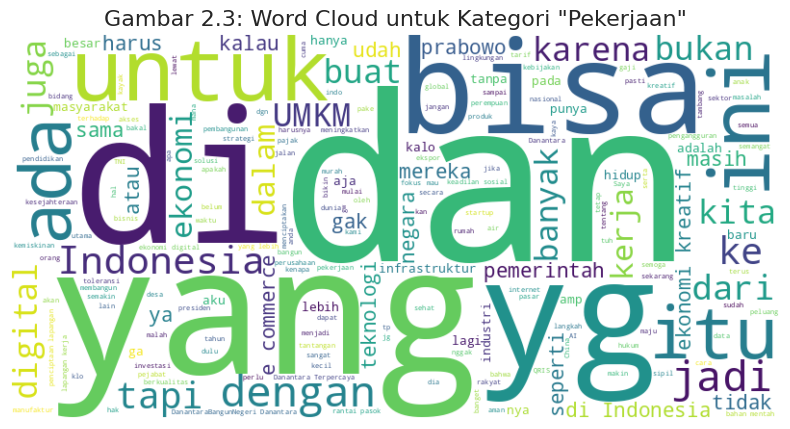

In [ ]:
from wordcloud import WordCloud

# Lakukan preprocessing sederhana dulu untuk hasil yang lebih bersih
teks_pekerjaan = ' '.join(train[train['label'] == 'pekerjaan']['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(teks_pekerjaan)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Gambar 2.3: Word Cloud untuk Kategori "Pekerjaan"', fontsize=16)
plt.show()

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=d6cd1a2b3500dbda0780aed8e801ea9b16e03276eea68f5d9988e004e5a2889f
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


⚙️ Menginstal library langdetect...
🔍 Menganalisis bahasa di setiap tweet (mungkin butuh beberapa saat)...
✅ Analisis selesai.


--- HASIL DISTRIBUSI BAHASA ---
bahasa
id    4987
en      10
de       1
hu       1
no       1
Name: count, dtype: int64


/tmp/ipython-input-725106666.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribusi_bahasa.values, y=distribusi_bahasa.index, palette='rocket')


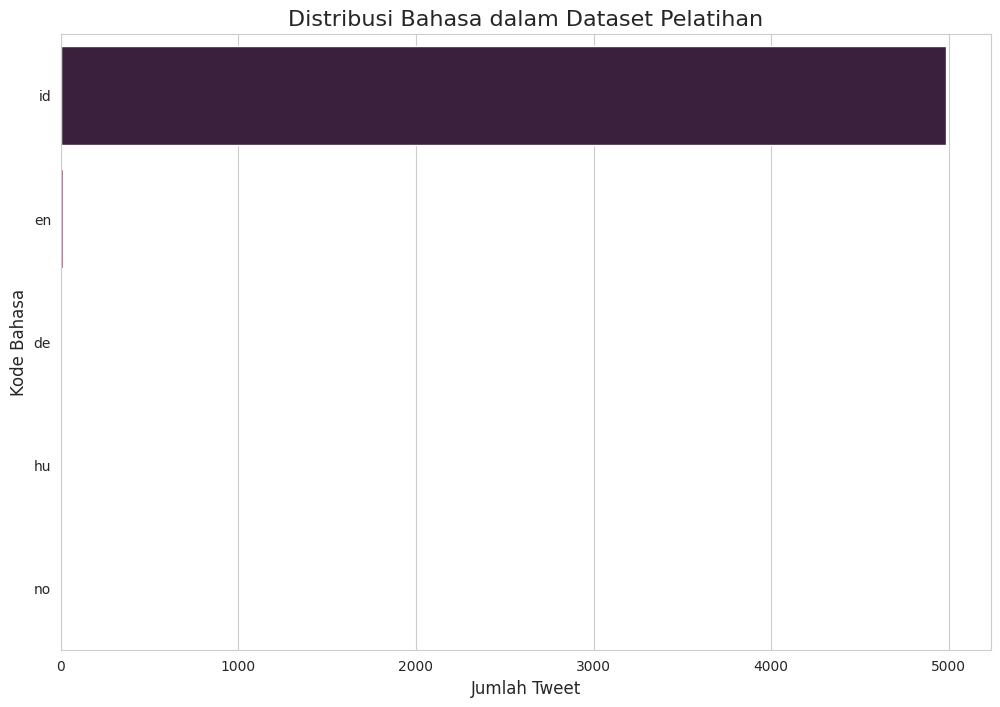

In [ ]:
# ==============================================================================
# ANALISIS DISTRIBUSI BAHASA PADA DATA TRAIN
# ==============================================================================

# 1. Instalasi Library
# ------------------------------------------------------------------------------
print("⚙️ Menginstal library langdetect...")
!pip install -q langdetect

import pandas as pd
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import seaborn as sns
import matplotlib.pyplot as plt

# Penting untuk hasil yang konsisten
DetectorFactory.seed = 0

# 2. Muat Data Anda
# ------------------------------------------------------------------------------

# 3. Buat Fungsi Deteksi Bahasa
# ------------------------------------------------------------------------------
def deteksi_bahasa(teks):
    """
    Fungsi untuk mendeteksi bahasa. Mengembalikan 'tidak terdeteksi' jika error.
    """
    try:
        # Pastikan input adalah string
        if not isinstance(teks, str) or len(teks.strip()) < 10: # Abaikan teks yg terlalu pendek
             return 'tidak terdeteksi'
        return detect(teks)
    except LangDetectException:
        return 'tidak terdeteksi'

# 4. Terapkan Fungsi ke Kolom Teks
# ------------------------------------------------------------------------------
print("🔍 Menganalisis bahasa di setiap tweet (mungkin butuh beberapa saat)...")
# Buat kolom baru 'bahasa' dengan menerapkan fungsi di atas
train['bahasa'] = train['text'].apply(deteksi_bahasa)
print("✅ Analisis selesai.")

# 5. Tampilkan Hasil Distribusi
# ------------------------------------------------------------------------------
print("\n\n--- HASIL DISTRIBUSI BAHASA ---")
distribusi_bahasa = train['bahasa'].value_counts()
print(distribusi_bahasa)

# 6. Visualisasi Hasil
# ------------------------------------------------------------------------------
plt.figure(figsize=(12, 8))
sns.barplot(x=distribusi_bahasa.values, y=distribusi_bahasa.index, palette='rocket')
plt.title('Distribusi Bahasa dalam Dataset Pelatihan', fontsize=16)
plt.xlabel('Jumlah Tweet', fontsize=12)
plt.ylabel('Kode Bahasa', fontsize=12)
plt.show()

In [ ]:
# ==============================================================================
# ANALISIS N-GRAM (BIGRAM & TRIGRAM)
# ==============================================================================

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re

# 1. Muat Data Anda
# ------------------------------------------------------------------------------


# 2. Lakukan Pra-pemrosesan Teks Sederhana
# ------------------------------------------------------------------------------
# Untuk hasil n-gram yang lebih bersih, kita lakukan cleaning dasar
def preprocess_text_simple(text):
    text = str(text).lower() # Ubah ke huruf kecil
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Hapus URL
    text = re.sub(r'\@\w+|\#', '', text) # Hapus mention dan hashtag
    text = re.sub(r'\d+', '', text) # Hapus angka
    text = re.sub(r'[^\w\s]', '', text) # Hapus tanda baca
    return text

print("✍️ Melakukan pra-pemrosesan teks...")
df_train['text_cleaned'] = df_train['text'].apply(preprocess_text_simple)


# 3. Fungsi untuk Mengekstrak N-gram
# ------------------------------------------------------------------------------
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    """
    Fungsi untuk mengekstrak dan menampilkan n-gram teratas dari sebuah korpus teks.
    """
    # Gunakan stopwords Bahasa Indonesia bawaan scikit-learn jika tersedia,
    # namun lebih baik menggunakan daftar custom yang lebih lengkap.
    # Untuk contoh ini, kita tidak gunakan stopwords agar semua frasa terlihat.
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# 4. Tampilkan Hasil
# ------------------------------------------------------------------------------
# Ekstrak teks yang sudah bersih
corpus = df_train['text_cleaned'].dropna()

# --- Menganalisis Bigram (frasa 2 kata) ---
print("\n\n--- TOP 20 BIGRAM ---")
top_bigrams = get_top_ngrams(corpus, n=20, ngram_range=(2, 2))
df_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frekuensi'])
display(df_bigrams)

# --- Menganalisis Trigram (frasa 3 kata) ---
print("\n\n--- TOP 20 TRIGRAM ---")
top_trigrams = get_top_ngrams(corpus, n=20, ngram_range=(3, 3))
df_trigrams = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frekuensi'])
display(df_trigrams)

✍️ Melakukan pra-pemrosesan teks...


--- TOP 20 BIGRAM ---


,Bigram,Frekuensi
0,hak asasi,297
1,keadilan sosial,296
2,asasi manusia,263
3,kebebasan berpendapat,262
4,energi bersih,211
5,di indonesia,187
6,data pribadi,161
7,akses internet,124
8,bagi seluruh,119
9,sosial bagi,119




--- TOP 20 TRIGRAM ---


,Trigram,Frekuensi
0,hak asasi manusia,262
1,keadilan sosial bagi,118
2,sosial bagi seluruh,112
3,bagi seluruh rakyat,100
4,seluruh rakyat indonesia,85
5,dan keadilan sosial,43
6,soal energi bersih,42
7,ekspor bahan mentah,41
8,regulasi keamanan siber,41
9,perlindungan data pribadi,31


In [ ]:
train['label'].value_counts()/ len(train['label'])

,count
label,
ideologi,0.2442
pertahanan,0.2142
reformasi,0.1542
harmoni,0.1328
sdm,0.0876
pekerjaan,0.0694
pemerataan,0.0612
hilirisasi,0.0364


# DATA UNDERSTANDING

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.7 MB/s eta 0:00:00


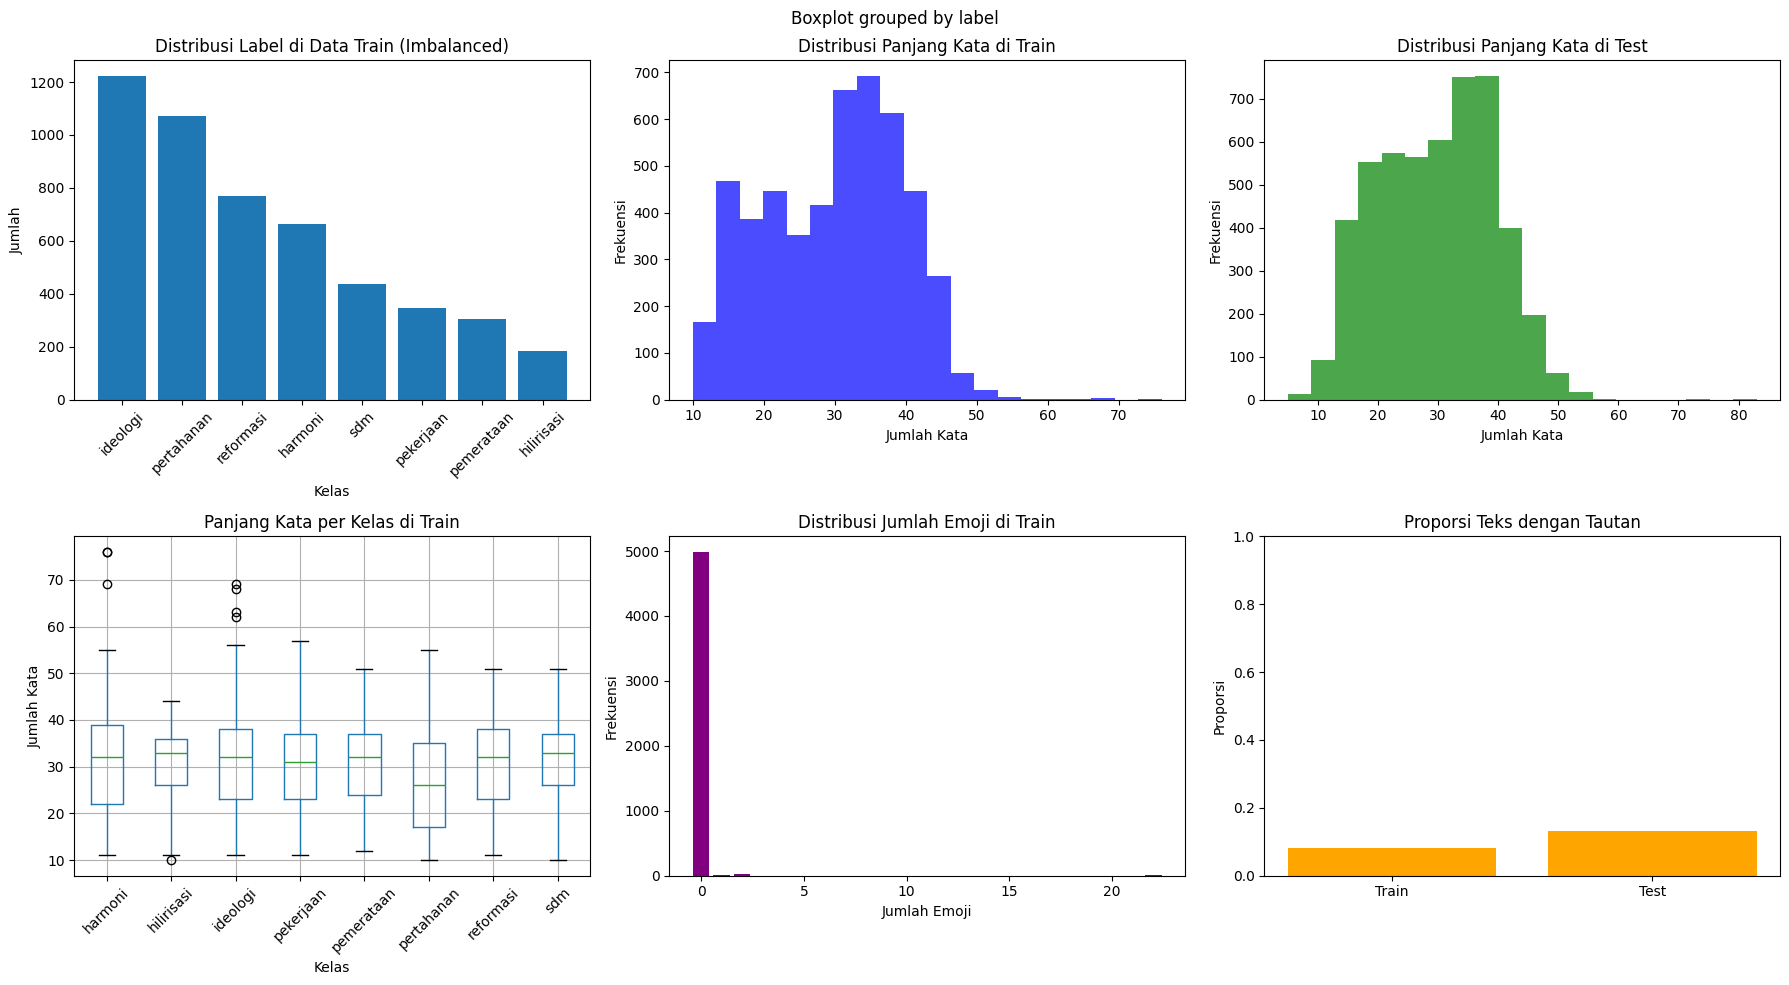

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import emoji

train_df = train.copy()
test_df = test.copy()

# Compute word lengths
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
test_df['word_count'] = test_df['text'].apply(lambda x: len(x.split()))

# Detect elements for characteristics
def count_emojis(text):
    return len(emoji.emoji_list(text))

def has_link(text):
    return 1 if re.search(r'http[s]?://', text) else 0

train_df['emoji_count'] = train_df['text'].apply(count_emojis)
train_df['has_link'] = train_df['text'].apply(has_link)
test_df['emoji_count'] = test_df['text'].apply(count_emojis)
test_df['has_link'] = test_df['text'].apply(has_link)

# Set up 2x3 grid for visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 1. Class distribution in train (imbalanced)
class_dist = train_df['label'].value_counts()
axes[0].bar(class_dist.index, class_dist.values)
axes[0].set_title('Distribusi Label di Data Train (Imbalanced)')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)

# 2. Histogram of word counts in train
axes[1].hist(train_df['word_count'], bins=20, color='blue', alpha=0.7)
axes[1].set_title('Distribusi Panjang Kata di Train')
axes[1].set_xlabel('Jumlah Kata')
axes[1].set_ylabel('Frekuensi')

# 3. Histogram of word counts in test
axes[2].hist(test_df['word_count'], bins=20, color='green', alpha=0.7)
axes[2].set_title('Distribusi Panjang Kata di Test')
axes[2].set_xlabel('Jumlah Kata')
axes[2].set_ylabel('Frekuensi')

# 4. Boxplot of word counts per class in train
train_df.boxplot(column='word_count', by='label', ax=axes[3], rot=45)
axes[3].set_title('Panjang Kata per Kelas di Train')
axes[3].set_xlabel('Kelas')
axes[3].set_ylabel('Jumlah Kata')

# 5. Emoji count distribution (to show characteristics)
emoji_dist_train = train_df['emoji_count'].value_counts().sort_index()
axes[4].bar(emoji_dist_train.index, emoji_dist_train.values, color='purple')
axes[4].set_title('Distribusi Jumlah Emoji di Train')
axes[4].set_xlabel('Jumlah Emoji')
axes[4].set_ylabel('Frekuensi')

# 6. Proportion with links (for informal elements)
link_prop = {
    'Train': train_df['has_link'].mean(),
    'Test': test_df['has_link'].mean()
}
axes[5].bar(link_prop.keys(), link_prop.values(), color='orange')
axes[5].set_title('Proporsi Teks dengan Tautan')
axes[5].set_ylabel('Proporsi')
axes[5].set_ylim(0, 1)

plt.tight_layout()
plt.show()

Dataset yang digunakan terdiri dari 10.000 tweet yang ```diambil dari platform X``` (sebelumnya Twitter), dengan rincian 5.000 data train yang memiliki label dan 5.000 data test yang tidak memiliki label. Setiap tweet dalam data train telah ```dikategorikan ke dalam delapan pilar Astacita```, yakni Ideologi, Pertahanan, Pekerjaan, SDM, Hilirisasi, Pemerataan, Reformasi, dan Harmoni. Karakteristik utama data ini adalah berupa ```teks pendek yang bersifat tidak terstruktur, mengandung bahasa informal, singkatan, campuran bahasa Indonesia–Inggris, serta sering disertai simbol, emoji, maupun tautan```. Kondisi tersebut menimbulkan tantangan dalam pemrosesan karena makna tweet kerap bergantung pada konteks sosial atau isu yang sedang berkembang. Selain itu, ```distribusi label pada data train tidak seimbang```, di mana topik-topik populer seperti pekerjaan atau pemerataan mungkin lebih dominan dibandingkan kategori lain seperti hilirisasi. Dari sisi kualitas, ```tidak semua tweet relevan dengan delapan pilar Astacita``` sehingga terdapat kemungkinan ```data noise``` yang harus disaring agar model dapat belajar secara lebih efektif. Dengan memahami karakteristik, distribusi, serta potensi masalah pada dataset ini, langkah preprocessing dan pemodelan dapat dirancang lebih tepat guna mencapai hasil klasifikasi yang akurat.

# PRA-PEMROSESAN U/ EKSPLORASI

Proses pembersihan data dilakukan dengan meninjau masalah pada salah satu label. Disini, kita gunakan label ideologi sebagai acuan pra-pemrosesan.

In [ ]:
train[train['label']=='ideologi']

,text,label,labels
0,@hyalfay @NatharElyas @BosPurwa @NatharElyas @...,ideologi,2
1,@sienchao @Sherly0ctaviany @jokowi Halo @Sienc...,ideologi,2
2,@LeotardosMy @easyanying Kita akui keberhasila...,ideologi,2
3,@LuckyGaben @susipudjiastuti @prabowo Indonesi...,ideologi,2
4,Kalo gua bukan buzzer. Dukungan kita terhadap ...,ideologi,2
...,...,...,...
3149,@warm_jack @Ary_PrasKe2 Aku setuju dgn Pig ai....,ideologi,2
3151,@ARSIPAJA gimana coba caranya transfer data pr...,ideologi,2
3409,Koperasi juga bisa mendidik toleransi dan ras...,ideologi,2
3597,@ARSIPAJA Sukak sukak lu. Lu mau angkat skrg j...,ideologi,2


## Remove Mentions

Perlu dilakukan penghapusan ```@``` dikarenakan kuantitasnya yang begitu banyak

In [ ]:
import re
def remove_mentions(text):
    return re.sub(r'@\S+', '', text)

train['clean_text'] = train['text'].apply(remove_mentions)
test['clean_text'] = test['text'].apply(remove_mentions)

In [ ]:
train = train[["clean_text", 'label']]
test = test[["clean_text"]]
train[train['label']=='ideologi']

,clean_text,label
0,Prabowo menang di 2024 karena strategi ce...,ideologi
1,Halo mungkin terus mengangkat isu negatif...,ideologi
2,Nama Budi BerlarI mungkin mencerminkan sikap...,ideologi
3,Kita akui keberhasilannya kita akui juga kek...,ideologi
4,Indonesia masih bisa menuju kesuksesan tapi...,ideologi
...,...,...
4469,gimana coba caranya transfer data pribadi (Pr...,ideologi
4753,Koperasi juga bisa mendidik toleransi dan ras...,ideologi
4960,Sukak sukak lu. Lu mau angkat skrg jadi pahla...,ideologi
4964,Memang Prabowo itu simbol budaya apa Kok kela...,ideologi


Simbol ```#``` juga bisa menyebabkan salah arti, misalnya pada
>  Hal itulah yang membuat SBY meminta putra sulungnya yang kini menjabat Ketua Umum Partai Demokrat Agus Harimurti Yudhoyono yang akrab disapa AHY mundur dari jabatan militer untuk berkarier di dunia politik. #sby #susilobambangyudhoyono #tni #mundur #politik #pemerintahan

dapat menyebabkan bias yang seharusnya masuk kelas ideologi justru ke pemerintahan

## Remove Hashtag

In [ ]:
def remove_hashtags(text):
    return re.sub(r'#\S+', '', text)

train['clean_text'] = train['clean_text'].apply(remove_hashtags)
test['clean_text'] = test['clean_text'].apply(remove_hashtags)

In [ ]:
train[train['label']=='ideologi']

,clean_text,label
0,Prabowo menang di 2024 karena strategi ce...,ideologi
1,Halo mungkin terus mengangkat isu negatif...,ideologi
2,Nama Budi BerlarI mungkin mencerminkan sikap...,ideologi
3,Kita akui keberhasilannya kita akui juga kek...,ideologi
4,Indonesia masih bisa menuju kesuksesan tapi...,ideologi
...,...,...
4469,gimana coba caranya transfer data pribadi (Pr...,ideologi
4753,Koperasi juga bisa mendidik toleransi dan ras...,ideologi
4960,Sukak sukak lu. Lu mau angkat skrg jadi pahla...,ideologi
4964,Memang Prabowo itu simbol budaya apa Kok kela...,ideologi


Dapat diperhatikan juga, banyak *tweet* yang memiliki kalimat tidak selesai, sebagai contoh
> Kalau gue ikut pemilu 2024 kayaknya gue bakal pilih Anies Baswedan. Dia punya rekam jejak kuat di inovasi digital dan e-governance plus komitmen ke hak asasi manusia. Prabowo punya ide kota inovasi tapi kontro

> Prabowo menang di 2024 karena strategi cerdas: media sosial ubah imej jadi gemoy buat anak muda aliansi sama Gibran anak Jokowi iklan digital besar dan nyambung budaya gotong royong . Dapet 58 58% sua

>	Situasi politik dan ekonomi Indonesia tahun 2025 dilihat positif dunia. Politik stabil di bawah Prabowo demokrasi kuat meski ada isu pengawasan. Ekonomi tumbuh 5 1% terbesar di ASEAN didukung konsumsi dan investasi. Isu judi onli

Akibatnya, dapat dilakuakn dua opsi strategi:
- Hapus kalimat terakhir, dengan logika jika ada kata setelah titik, maka hapus kalimat setelah titik terkahir, jika tidak ada kata, maka pertahankan

## Truncated Text

In [ ]:
import re

def remove_short_after_last_period(text):
    # Cari posisi titik terakhir
    last_dot = text.rfind(".")

    # Kalau tidak ada titik, langsung return
    if last_dot == -1:
        return text.strip()

    # Ambil bagian setelah titik terakhir
    after_dot = text[last_dot+1:].strip()

    # Pecah jadi kata
    words_after_dot = after_dot.split()

    if words_after_dot:
        first_word = words_after_dot[0]
        # Kalau kata pertama setelah titik < 5 huruf, buang semuanya setelah titik
        if len(first_word) < 5:
            return text[:last_dot+1].strip()

    # Kalau aman, kembalikan teks asli
    return text.strip()

# Hapus baris yang terpotong
train["clean_text"] = train["clean_text"].apply(remove_short_after_last_period)
test["clean_text"] = test["clean_text"].apply(remove_short_after_last_period)

In [ ]:
train[train['label']=='ideologi']

,clean_text,label
0,Prabowo menang di 2024 karena strategi cerdas:...,ideologi
1,Halo mungkin terus mengangkat isu negatif Jo...,ideologi
2,Nama Budi BerlarI mungkin mencerminkan sikap k...,ideologi
3,Kita akui keberhasilannya kita akui juga kekur...,ideologi
4,Indonesia masih bisa menuju kesuksesan tapi RU...,ideologi
...,...,...
4469,gimana coba caranya transfer data pribadi (Pri...,ideologi
4753,Koperasi juga bisa mendidik toleransi dan rasa...,ideologi
4960,Sukak sukak lu.,ideologi
4964,Memang Prabowo itu simbol budaya apa Kok kelah...,ideologi


Beberapa kata tidak memiliki kata yang lengkap, akan dilakukan stemming dengan Sastrawi sekaligus Case Folding dan deleting double space.

In [ ]:
pip install Sastrawi

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def normalize_and_stem(text):
    text = text.lower()  # huruf kecil semua
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi ganda
    return stemmer.stem(text)

train["clean_text"] = train["clean_text"].apply(normalize_and_stem)
test["clean_text"] = test["clean_text"].apply(normalize_and_stem)

In [ ]:
train[train['label']=='ideologi']

Masalah terakhir adalah terkait ejaan kata yang tidak sesuai seperti
> 	prosesi tsb dlm literasi agama nama hereys bid ah jk jadi thn 80an maka dunia akan cap indonesia sbg ngr militer

> 	jenderal soedirman bagai panglima tinggi militer saat itu tampak tidak tahu rencana culi syahrir di solo sadar akan bahaya peristiwa ini hadap usaha indonesia utk tahan merdeka 100 presiden soekarno ambil alih tugas pemerintahab

In [ ]:
pip install indo-normalizer

In [ ]:
import re
from indo_normalizer import Normalizer

# Inisialisasi normalizer Indo
normalizer = Normalizer()

def normalize_text_only(text):
    # Lowercase
    text = text.lower()

    # Normalisasi slang/alay/typo pakai Indo-Normalizer
    text, _ = normalizer.normalize_text(text)

    # Hilangkan karakter non-huruf (tapi biarkan spasi)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Hapus spasi ganda
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Contoh penggunaan
train["clean_text"] = train["clean_text"].apply(normalize_text_only)
test["clean_text"] = test["clean_text"].apply(normalize_text_only)

In [ ]:
train[train['label']=='ideologi']

Terdapat beberapa *stopword* yang perlu ditangani. Akan digunakan dua strategi:
- manual
- nltk stopword

In [ ]:
pip install nlp-id

In [ ]:
from nlp_id.stopword import StopWord
stopword = StopWord()
stop_words = stopword.get_stopword()
# hapus stopword
train['clean_text'] = train['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
test['clean_text'] = test['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [ ]:
train[train['label']=='ideologi']

## RANGKUMAN MASALAH PADA DATA

Dalam tahap pembersihan data, terdapat beberapa permasalahan utama yang harus ditangani. Simbol seperti @ dan # perlu dihapus karena jumlahnya yang masif dapat menimbulkan bias klasifikasi, misalnya tagar #politik atau #pemerintahan dapat salah diarahkan ke kategori tertentu meski konteks sebenarnya adalah ideologi. Selain itu, banyak tweet yang berisi kalimat tidak selesai sehingga strategi yang diterapkan adalah memotong teks setelah titik terakhir, atau mempertahankan bila tidak ada kata setelah titik. Proses case folding, stemming dengan Sastrawi, serta penghapusan spasi ganda juga dilakukan untuk menyeragamkan bentuk kata. Masalah lain muncul pada kata-kata dengan ejaan tidak baku dan singkatan yang beragam, di mana penggunaan stopword removal harus hati-hati: baik secara manual maupun dengan nltk stopword list. ```Pembersihan yang terlalu agresif justru dapat mengurangi kemampuan model dalam menangkap makna, terutama untuk model berbasis count atau case matching, karena banyak informasi penting yang ikut hilang```. Oleh karena itu, semantik menjadi metode yang sangat dipertimbangkan. Namun, `beberapa data memiliki case matching yang baik` sehingga model dengan vectorizer TF-IDF ataupun Countvectorizer tetap dipertimbangkan.

# EDA

### SEBARAN KELAS

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'ideologi'),
  Text(1, 0, 'pertahanan'),
  Text(2, 0, 'pekerjaan'),
  Text(3, 0, 'sdm'),
  Text(4, 0, 'hilirisasi'),
  Text(5, 0, 'pemerataan'),
  Text(6, 0, 'reformasi'),
  Text(7, 0, 'harmoni')])

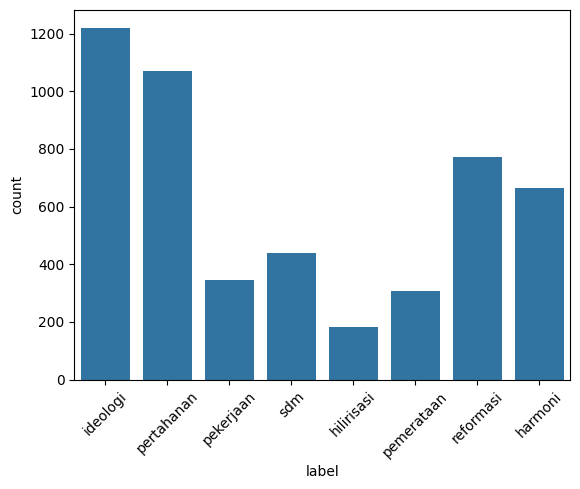

In [ ]:
sns.countplot(x='label', data=train)
plt.xticks(rotation=45)

Label pekerjaan, sdm, hilirisasi, dan pemerataan, cenderung minoritas.

## Kepadatan Text

In [ ]:
# Menambahkan kolom baru 'text_length' yang berisi panjang teks
train['text_length'] = train['clean_text'].apply(len)
test['text_length'] = test['clean_text'].apply(len)

# Menghitung statistik deskriptif untuk panjang teks per kelas
length_stats_by_class = train.groupby('label')['text_length'].describe()
print(length_stats_by_class)

# Visualisasi distribusi panjang teks per kelas (dengan histogram)
plt.figure(figsize=(6, 4))
for label in train['label'].unique():
    subset = train[train['label'] == label]
    sns.kdeplot(subset['text_length'], label=label, fill=True)
plt.title('Distribusi Panjang Teks per Kelas')
plt.xlabel('Panjang Teks (Jumlah Karakter)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

## Kata-kata apa yang paling sering muncul di setiap kelas?

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  #
nltk.download('stopwords')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
import nltk

# Inisialisasi dictionary untuk menyimpan frekuensi kata per kelas
word_freq_by_class = defaultdict(lambda: defaultdict(int))

# Iterasi per baris DataFrame
for index, row in train.iterrows():
    label = row['label']
    words = nltk.word_tokenize(row['clean_text']) # atau .split()
    for word in words:
        word_freq_by_class[label][word] += 1

# Menampilkan 10 kata teratas untuk setiap kelas
for label, word_counts in word_freq_by_class.items():
    top_words = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10]
    print(f"\nKata Paling Sering di Kelas '{label}':")
    for word, count in top_words:
        print(f"- {word}: {count}")


##  Apakah ada korelasi antara panjang teks dan label kelas?

In [ ]:
# Visualisasi dengan boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x='label', y='text_length', data=train)
plt.title('Distribusi Panjang Teks per Kelas (Boxplot)')
plt.xlabel('Kelas')
plt.ylabel('Panjang Teks (Karakter)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## KATA EKSKLUSIF

In [ ]:
label_words = {lbl: set(" ".join(train[train['label']==lbl]['clean_text']).split())
               for lbl in train['label'].unique()}

exclusive_words = {lbl: label_words[lbl] - set.union(*(label_words[k] for k in label_words if k != lbl))
                   for lbl in label_words}

exclusive_words

Kata eksklusif justru merujuk pada username X setelah dihlakukan pengahapusan.

## Distribusi Train dan Test

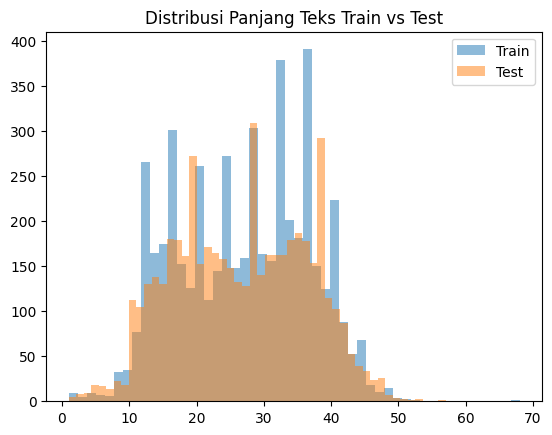

In [ ]:
train['text_len'] = train['clean_text'].apply(lambda x: len(x.split()))
test['text_len'] = test['clean_text'].apply(lambda x: len(x.split()))

plt.hist(train['text_len'], bins=50, alpha=0.5, label='Train')
plt.hist(test['text_len'], bins=50, alpha=0.5, label='Test')
plt.legend()
plt.title("Distribusi Panjang Teks Train vs Test")
plt.show()

/tmp/ipython-input-3114145743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='label', y='text_len', palette='Set2')


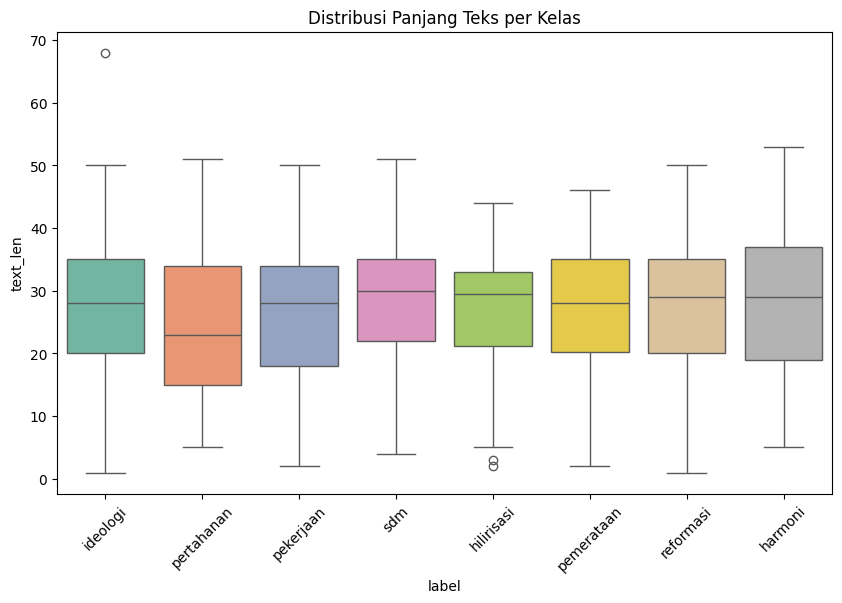

                 mean  median  min  max
label                                  
pertahanan  24.594771    23.0    5   51
pekerjaan   26.452450    28.0    2   50
hilirisasi  27.252747    29.5    2   44
ideologi    27.586405    28.0    1   68
pemerataan  27.656863    28.0    2   46
reformasi   27.811933    29.0    1   50
harmoni     28.165663    29.0    5   53
sdm         28.643836    30.0    4   51


In [ ]:
# Hitung panjang teks
train['text_len'] = train['clean_text'].apply(lambda x: len(x.split()))

# Boxplot distribusi panjang teks per label
plt.figure(figsize=(10,6))
sns.boxplot(data=train, x='label', y='text_len', palette='Set2')
plt.title("Distribusi Panjang Teks per Kelas")
plt.xticks(rotation=45)
plt.show()

# Statistik per kelas
stats_per_class = train.groupby('label')['text_len'].agg(['mean', 'median', 'min', 'max']).sort_values('mean')
print(stats_per_class)


Keduanya memiliki panjang teks yang memiliki distribusi yang mirip dan panjang teks di tiap kelas cenderung seimbang.

# PERENCANAAN MODELLING

Beberapa tweet mengandung ```indikator leksikal yang sangat deterministik``` (mis. nama tokoh, tagar, singkatan atau frasa khas) yang ```sebaiknya ditangkap melalui mekanisme matching``` atau representasi berbasis hitungan (TF-IDF / n-gram case-sensitive). Di sisi lain, banyak tweet singkat atau terpotong ```membutuhkan pemahaman semantik — pola implisit```, sinonimi, dan konteks pragmatis — yang lebih baik ditangkap oleh ```model berbasis representasi kontekstual``` seperti IndoBERTweet. Oleh karena itu, ```strategi hybrid``` menggabungkan kekuatan keduanya: precision dari model konvensional pada fitur case-sensitive / lexical cues, dan generalization dari BERT pada representasi semantik.

# DIAGRAM ALIR

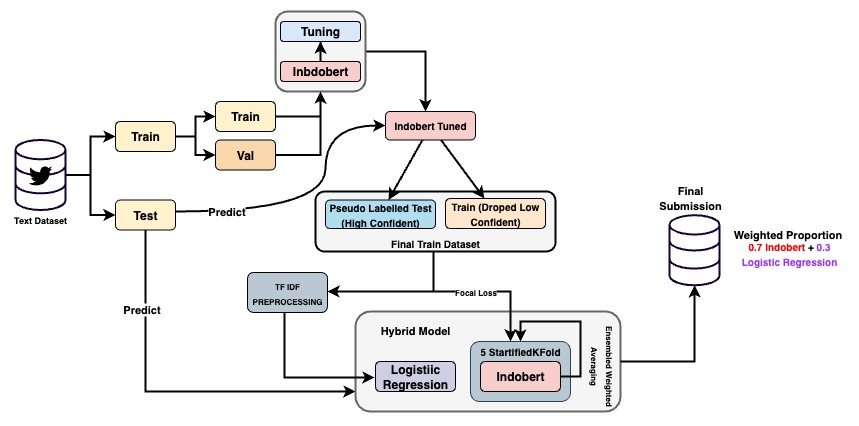

# PEMODELAN BERBASIS REPRESENTASI KONTEKSTUAL (BERT)

## KONSEP Model Transformer (BERT)

BERT adalah model berbasis Transformer yang membaca teks secara bidirectional. Dilatih dengan Masked Language Model (MLM) dan Next Sentence Prediction (NSP), lalu bisa di-fine-tune untuk berbagai tugas NLP. Kelebihan Pemodelan BERT adalah
1. Tidak perlu preprocessing manual yang rumit

    - Metode lama biasanya butuh stopword removal, stemming/lemmatization, atau TF-IDF weighting biar model bisa jalan.

    - BERT langsung belajar representasi kata dari konteksnya, jadi preprocessing bisa lebih minimal (cukup cleaning dasar).

2. Tokenisasi otomatis dan berbasis sub-word

    - Memang tetap ada tokenisasi, tapi bukan manual.

    - BERT pakai WordPiece tokenizer, yang memecah kata jadi potongan sub-word.Contoh: "unhappiness" → "un", "##happiness".

    - Keuntungannya: bisa handle kata baru (out-of-vocabulary) dengan tetap mempertahankan makna.

3. Makna semantik lebih kuat

    - Word2Vec atau GloVe kasih vektor kata statis → kata “bank” punya satu vektor, baik artinya tepi sungai atau institusi keuangan.

    - BERT kasih representasi dinamis sesuai konteks → "river bank" ≠ "financial bank".

4. Bidirectional Context
    - Model lama kayak RNN atau LSTM sering hanya lihat urutan kiri → kanan (atau sebaliknya).

    - BERT baca teks dua arah sekaligus, jadi bisa paham konteks penuh. Misal: kalimat “The animal didn’t cross the street because it was too tired”,  “it” bisa dipahami sebagai “animal” karena ada info dari kiri dan kanan.

5. Pre-trained, bisa di-fine-tune

    - BERT sudah dilatih besar-besaran dengan MLM + NSP, jadi cukup tambahin lapisan output dan fine-tuning untuk tugas spesifik (klasifikasi, NER, QA, dll). Ini bikin performanya jauh lebih baik meskipun data latih khusus terbatas.

6. General-purpose & State-of-the-Art

    - Bisa dipakai untuk banyak tugas NLP: sentiment analysis, named entity recognition, question answering, paraphrase detection, dll.

    - Banyak benchmark NLP (GLUE, SQuAD, dll) sudah terbukti BERT ngasih hasil SOTA (state of the art).

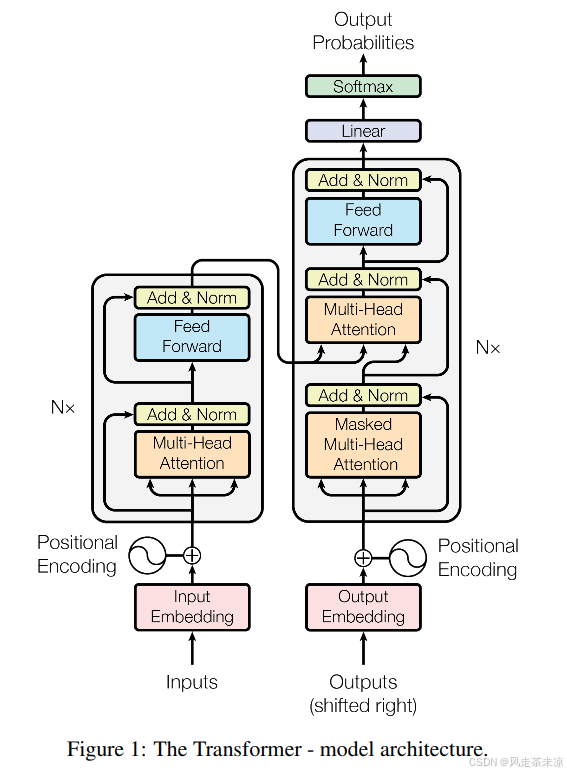

> **Mekanisme BERT secara Prosedural**

1. Input Teks → Tokenisasi

   * Kalimat dipecah menjadi unit kecil yang disebut *token* (kata atau sub-kata).
   * Contoh: `"BERT sangat pintar"` → `[CLS], BERT, sangat, pintar, [SEP]`.
   * Secara matematis: teks $T$ diubah menjadi urutan token $[t_1, t_2, \dots, t_n]$.

2. **Token → Vektor Angka (Embedding)**

   * Setiap token dikonversi ke vektor angka melalui *embedding layer*.
   * Jadi, tiap token $t_i$ punya representasi $\mathbf{e}_i \in \mathbb{R}^d$.
   * Misal dimensi $d = 768$, maka satu kata jadi vektor dengan 768 angka.

3. **Posisi Token → Positional Encoding**

   * Karena urutan kata penting, BERT menambahkan informasi posisi.
   * Jadi vektor final tiap token:

     $$
     \mathbf{x}_i = \mathbf{e}_i + \mathbf{p}_i
     $$

     di mana $\mathbf{p}_i$ adalah vektor posisi.

4. **Masuk ke Lapisan Transformer (Self-Attention)**

   * Tiap token belajar “memperhatikan” token lain melalui *self-attention*.
   * Tiga vektor dihitung untuk tiap token:

     * Query ($Q$), Key ($K$), dan Value ($V$) dengan transformasi linier.
   * Skor perhatian dihitung:

     $$
     \text{Attention}(Q,K,V) = \text{softmax}\!\left(\frac{QK^\top}{\sqrt{d_k}}\right)V
     $$
   * Intinya: kata “pintar” bisa lebih memperhatikan “BERT” dibanding “sangat”.

5. **Multi-Head Attention → Lebih Kaya Makna**

   * Ada banyak kepala (*heads*) yang belajar hubungan berbeda (makna semantik, tata bahasa, dll).
   * Semua hasilnya digabungkan jadi representasi token baru.

6. **Lapisan Feed-Forward + Normalisasi**

   * Setelah perhatian, vektor token diproses dengan jaringan saraf sederhana dan dinormalisasi.
   * Proses ini diulang berkali-kali (misal 12 atau 24 lapisan).

7. **Output Representasi Teks**

   * Hasil akhirnya: tiap token punya representasi kontekstual.
   * Token `[CLS]` biasanya dipakai untuk keseluruhan kalimat (misal klasifikasi).
   * Token lain bisa dipakai untuk tugas spesifik seperti *named entity recognition* atau *question answering*.


## KARAKTERISTIK BERT

- Bidirectional → membaca teks dari kiri ke kanan dan dari kanan ke kiri secara bersamaan.

- Berdasarkan Transformer Encoder → memakai arsitektur transformer encoder yang kuat untuk memahami konteks.

- Pre-trained → dilatih terlebih dahulu dengan data teks yang sangat besar (Wikipedia, BookCorpus).

- Masked Language Model (MLM) → belajar menebak kata yang disembunyikan dalam kalimat.

- Next Sentence Prediction (NSP) → belajar memahami hubungan antar-kalimat.

- Fleksibel → bisa digunakan kembali (fine-tuning) untuk berbagai tugas NLP (klasifikasi, tanya-jawab, penerjemahan, dsb).

# Hyperparameter Tuning
Pada notebook ini, kita akan melakukan dua tahap penting:  
1. **Hyperparameter Tuning** pada IndoBERT menggunakan Optuna  
2. **Label Cleaning** menggunakan Cleanlab  

Kenapa urutannya begitu?  
- Model yang sudah optimal → prediksi lebih akurat → cleaning lebih tepat.  


> Setup & Import Library

Cek GPU, lalu import library yang dibutuhkan.


In [ ]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Menggunakan device: {device}")

Menggunakan device: cuda


> Muat Dataset

Kita ambil dataset `train.csv`, lalu split ke train/valid.  
Setelah itu siapkan tokenizer IndoBERT.


In [ ]:
df_train_full = train
labels = sorted(df_train_full['label'].unique().tolist())
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}
df_train_full['labels'] = df_train_full['label'].map(label2id)

df_train, df_val = train_test_split(
    df_train_full, test_size=0.2, random_state=SEED, stratify=df_train_full['labels']
)

train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)

model_name = "indolem/indobertweet-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(
        examples["text"], padding="max_length", truncation=True, max_length=128
    )

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True).remove_columns(['text', 'label', '__index_level_0__'])
tokenized_val_dataset = val_dataset.map(tokenize_function, batched=True).remove_columns(['text', 'label', '__index_level_0__'])


Pada potongan kode tersebut, proses **tokenizing** dilakukan dengan memanfaatkan **tokenizer** dari model IndoBERTweet. Fungsi `tokenize_function` mengubah teks mentah (`examples["text"]`) menjadi representasi numerik berupa token dengan panjang maksimal 128, serta menambahkan padding agar semua input memiliki panjang sama dan melakukan truncation bila teks lebih panjang dari batas tersebut. Dataset latih (`train_dataset`) dan validasi (`val_dataset`) kemudian dipetakan dengan fungsi ini menggunakan `.map()`, sehingga setiap teks dalam dataset dikonversi menjadi token. Kolom asli seperti `text`, `label`, dan `__index_level_0__` dihapus menggunakan `.remove_columns()` agar dataset yang tersisa hanya berisi hasil tokenisasi (input IDs, attention mask, dll.) yang siap digunakan oleh model BERT.


> Hyperparameter Tuning IndoBERT

Kita pakai **Optuna** melalui `Trainer.hyperparameter_search`.  
Tujuan: cari kombinasi learning rate, batch size, epoch, dll. terbaik.


In [ ]:
from transformers import Trainer

# Model init
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=len(labels), id2label=id2label, label2id=label2id
    )

# Metrics
def compute_metrics(eval_pred):
    predictions, labels_eval = eval_pred
    predictions = predictions.argmax(axis=1)
    return {"balanced_accuracy": balanced_accuracy_score(labels_eval, predictions)}

trainer = Trainer(
    model_init=model_init,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

# Ruang pencarian hyperparameter
def hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-6, 5e-5, log=True),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 2, 5),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16]),
        "weight_decay": trial.suggest_float("weight_decay", 0.01, 0.1, log=True),
    }

print("\n🚀 Memulai pencarian hyperparameter...")
best_run = trainer.hyperparameter_search(
    direction="maximize",
    backend="optuna",
    hp_space=hp_space,
    n_trials=10
)

>Hasil Hyperparameter Tuning

Setelah selesai, kita tampilkan kombinasi hyperparameter terbaik.


In [ ]:
print("\n--- HASIL HYPERPARAMETER TUNING TERBAIK ---")
print(f"Balanced Accuracy terbaik: {best_run.objective:.4f}")
for param, value in best_run.hyperparameters.items():
    print(f"- {param}: {value}")

Didaptkan Tunning terbaik , `batch_size=16`, `learning_rate=3.752879110147595e-05`, `weight_decay=0.056124444423783882`, `num_train_epoch=4`

# Confidence Learning dengan Cleanlab
Pada bagian ini kita akan membersihkan dataset dari label yang salah atau tidak konsisten
menggunakan *confidence learning* (Cleanlab).  

Langkah-langkah:  
1. Instalasi library & import  
2. Load dataset & prediksi OOF  
3. Analisis potensi label bermasalah  
4. Terapkan batas maksimal penghapusan  
5. Buat dataset bersih  
6. Siapkan untuk training ulang


> Menghasilkan Prediksi Out-of-Fold (OOF)

Untuk mendeteksi label bermasalah, kita perlu terlebih dahulu membuat prediksi Out-of-Fold (OOF) menggunakan K-Fold Cross Validation.
Pada tiap fold, model dilatih pada data latih lalu dipakai memprediksi data validasi.
Hasil prediksi tiap fold digabung menjadi oof_logits yang mencakup semua data, tanpa ada data leakage.

In [ ]:
N_SPLITS_OOF = 5
skf_oof = StratifiedKFold(n_splits=N_SPLITS_OOF, shuffle=True, random_state=42)
oof_logits = np.zeros((len(df_train_full), len(labels)))

model_name = "indolem/indobertweet-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

print(f"\n🚀 Memulai {N_SPLITS_OOF}-Fold Cross-Validation untuk menghasilkan prediksi OOF...")
for fold, (train_idx, val_idx) in enumerate(skf_oof.split(df_train_full, df_train_full['labels'])):
    print(f"\n--- OOF Fold {fold + 1}/{N_SPLITS_OOF} ---")

    train_fold_df = df_train_full.iloc[train_idx]
    val_fold_df = df_train_full.iloc[val_idx]
    train_dataset_fold = Dataset.from_pandas(train_fold_df)
    val_dataset_fold = Dataset.from_pandas(val_fold_df)

    tokenized_train_fold = train_dataset_fold.map(tokenize_function, batched=True, load_from_cache_file=False).remove_columns(['text', 'label'])
    tokenized_val_fold = val_dataset_fold.map(tokenize_function, batched=True, load_from_cache_file=False).remove_columns(['text', 'label'])

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))
    training_args = TrainingArguments(
        output_dir=f"./hasil_fold_oof_{fold+1}", num_train_epochs=4,
        learning_rate=3.75e-5, per_device_train_batch_size=16, weight_decay=0.056,
        evaluation_strategy="no", save_strategy="no", report_to="none"
    )
    trainer = Trainer(model=model, args=training_args, train_dataset=tokenized_train_fold)
    trainer.train()

    oof_predictions = trainer.predict(tokenized_val_fold)
    oof_logits[val_idx] = oof_predictions.predictions

print("\n✅ Prediksi Out-of-Fold berhasil dibuat.")


> Identifikasi & Pembersihan Label Bermasalah dengan Cleanlab

Setelah semua prediksi OOF didapat, kita konversi ke bentuk probabilitas dengan softmax.
Kemudian, kita gunakan Cleanlab untuk menemukan label yang kemungkinan salah (mislabel/noisy).
Data dengan label bermasalah dihapus dari dataset untuk menghasilkan versi dataset yang lebih bersih.

In [ ]:
print("\n\n--- Menganalisis Prediksi OOF dengan cleanlab ---")
oof_probs = torch.nn.functional.softmax(torch.from_numpy(oof_logits), dim=-1).numpy()
indices_to_remove = find_label_issues(
    labels=df_train_full['labels'].values, pred_probs=oof_probs
)
print(f"✅ Cleanlab menemukan {len(indices_to_remove)} potensi label yang salah.")

df_train_cleaned = df_train_full.drop(index=indices_to_remove)
print(f"Ukuran dataset setelah dibersihkan: {len(df_train_cleaned)} baris.")

Data yang sudah dibersihkan sudah terdapat pada tautan berikut
https://drive.google.com/file/d/1oq2IWE2UTcBVvyIzmt-SlhzvaP-wNye3/view
, yang selanjutnya akan didefinisikan sebagai "train_cleaned"

In [ ]:
import pandas as pd

In [ ]:
# Train Clean: https://drive.google.com/uc?export=download&id=1uaQxaaF9SsF56pTodnNTLb4AQyPXcQam
train_cleaned = pd.read_csv('https://drive.google.com/uc?export=download&id=1uaQxaaF9SsF56pTodnNTLb4AQyPXcQam')

# Test: https://drive.google.com/file/d/1zpmpdLFmI7dS_jzRSlhIzXTazh4J9zXJ/view?usp=drive_link
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1zpmpdLFmI7dS_jzRSlhIzXTazh4J9zXJ')

# FOCAL-LOSS

> Focal loss

Focal Loss adalah pengembangan dari Cross-Entropy Loss yang didesain untuk mengatasi masalah class imbalance (kelas tidak seimbang).
Focal Loss menambahkan dua komponen penting:

1. Modulating factor $(1 - p_t)^\gamma$

    $p_t = p(y|x)$ yaitu probabilitas prediksi benar.Jika $p_t$ tinggi (model sudah yakin benar), loss diperkecil. Jika $p_t$ rendah (model salah prediksi), loss diperbesar.

2. Class balancing weight $\alpha$

    Digunakan untuk memberi bobot lebih pada kelas minoritas.Rumus lengkapnya:
    $$\mathcal{L}_{Focal}(x,y) = -\alpha_y(1-p_t)^{\gamma}log(p_t)$$
    dengan:

    $p_t = p(y|x)$,

    $\alpha_y$ = bobot untuk kelas $y$,

    $\gamma \geq 0$ = parameter focusing (biasanya $\gamma = 2$).

    Jika $\gamma = 0$, maka Focal Loss kembali menjadi Cross-Entropy biasa.

> Cross-Entropy Loss (dasar)

   Untuk satu sampel dengan label asli $y \in {1, \dots, C}$ dan probabilitas prediksi model $p(c|x)$:
  $$\mathcal{L}_{CE}(x,y) = - log(p|yx)$$
  Secara matematis, jika dataset memiliki $N$ sampel $\{(x_i, y_i)\}_{i=1}^N$,
  maka fungsi loss total dihitung sebagai:

$$
\mathcal{L} = \frac{1}{N} \sum_{i=1}^{N} \mathcal{L}_{\text{Focal}}(x_i, y_i),
$$

dengan $\mathcal{L}_{\text{Focal}}$ adalah Focal Loss yang telah
didefinisikan sebelumnya.

Jika opsi `reduction='mean'`, maka:

$$
\mathcal{L}_{\text{mean}} = \frac{1}{N} \sum_{i=1}^{N} \mathcal{L}_{\text{Focal}}(x_i, y_i).
$$

Sedangkan jika opsi `reduction='sum'`, maka:

$$
\mathcal{L}_{\text{sum}} = \sum_{i=1}^{N} \mathcal{L}_{\text{Focal}}(x_i, y_i).
$$


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils.class_weight import compute_class_weight
from transformers import Trainer

# Definisikan Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, logits, labels):
        ce_loss = F.cross_entropy(logits, labels, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.alpha is not None:
            alpha_t = self.alpha[labels]
            focal_loss = alpha_t * focal_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# Buat Custom Trainer untuk menggunakan Focal Loss
class CustomTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        if class_weights is not None:
            self.class_weights = torch.tensor(class_weights, dtype=torch.float).to(self.args.device)
        else:
            self.class_weights = None

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # Gunakan Focal Loss di sini
        loss_fct = FocalLoss(alpha=self.class_weights, gamma=2.0)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

# PSEUDO-LABELLING

> Latih Model Guru dengan Data Bersih

Setelah data dilabeli ulang dengan Cleanlab, kita latih sebuah model (disebut model guru) menggunakan dataset yang sudah bersih.
Tujuannya: agar model ini bisa menghasilkan prediksi yang lebih dapat dipercaya.

$$\hat{y}=f_{\theta}(x) $$
dengan $f_{\theta}$ adalah model guru yang sudah dilatih pada data bersih

In [ ]:
from transformers import TrainingArguments

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)
model_name = "indolem/indobertweet-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

labels = sorted(train_cleaned['label'].unique().tolist())
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

df_train_cleaned = train_cleaned
df_train_cleaned['labels'] = df_train_cleaned['label'].map(label2id)
df_train_guru, df_val_guru = train_test_split(
    df_train_cleaned, test_size=0.2, random_state=42, stratify=df_train_cleaned['labels']
)

train_dataset_guru = Dataset.from_pandas(df_train_guru)
val_dataset_guru = Dataset.from_pandas(df_val_guru)
tokenized_train_guru = train_dataset_guru.map(tokenize_function, batched=True, load_from_cache_file=False).remove_columns(['text', 'label'])
tokenized_val_guru = val_dataset_guru.map(tokenize_function, batched=True, load_from_cache_file=False).remove_columns(['text', 'label'])

model_guru = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {"balanced_accuracy": balanced_accuracy_score(p.label_ids, preds)}

training_args_guru = TrainingArguments(
    output_dir="./model_guru_bersih", num_train_epochs=4, learning_rate=3.75e-5,
    per_device_train_batch_size=16, weight_decay=0.056, eval_strategy="epoch",
    save_strategy="epoch", load_best_model_at_end=True, metric_for_best_model="balanced_accuracy", report_to="none"
)

trainer_guru = Trainer(
    model=model_guru, args=training_args_guru,
    train_dataset=tokenized_train_guru, eval_dataset=tokenized_val_guru,
    compute_metrics=compute_metrics
)
trainer_guru.train()

> Prediksi pada Data Unlabeled (Data Uji)

Model guru digunakan untuk menghasilkan probabilitas pada data uji.
Setiap teks $x$ diberi distribusi probabilitas kelas dengan fungsi softmax:
$$P(y=c | x) = \frac{e^{z_c}}{\sum_j e^{z_j}}$$
di mana $z_c$ adalah logit (*output mentah*) untuk kelas $c$.

In [ ]:
test_dataset = Dataset.from_pandas(df_test)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True, load_from_cache_file=False).remove_columns(['text'])
raw_predictions = trainer_guru.predict(tokenized_test_dataset)
test_logits = raw_predictions.predictions

# Konversi ke probabilitas
probabilities = torch.nn.functional.softmax(torch.from_numpy(test_logits), dim=-1).numpy()
confidence_scores = np.max(probabilities, axis=1)
predicted_class_ids = np.argmax(test_logits, axis=1)

> Seleksi Pseudo-Label Berdasarkan Confidence

Hanya prediksi dengan confidence tinggi (misalnya > 90%) yang diambil sebagai pseudo-label.
Secara matematis, kita pilih:
$$\hat{y} = \arg\max P(y = c \mid x), \quad \text{dengan syarat} \quad \max P(y = c \mid x) > \tau
 $$
dengan $\tau=0.9$ sebagai *confidence treshold*

In [ ]:
CONFIDENCE_THRESHOLD = 0.90
pseudo_labels_indices = np.where(confidence_scores > CONFIDENCE_THRESHOLD)[0]

pseudo_labels_df = pd.DataFrame({
    'text': df_test.iloc[pseudo_labels_indices]['text'],
    'label': [id2label[id] for id in predicted_class_ids[pseudo_labels_indices]]
})
print(f"Ditemukan {len(pseudo_labels_df)} pseudo-label baru.")

> Gabungkan dengan Data Bersih → Dataset Augmented

Pseudo-label yang lolos threshold ditambahkan ke dataset bersih untuk memperbesar data latih.
Ini disebut self-training: model dilatih ulang dengan data asli + pseudo-label.

$$D_{aug} = D_{clean} \> \cup D_{pseudo}$$

In [ ]:
df_train_augmented = pd.concat(
    [df_train_cleaned[['text', 'label']], pseudo_labels_df],
    ignore_index=True
)
df_train_augmented['labels'] = df_train_augmented['label'].map(label2id)
print(f"Ukuran dataset latih final: {len(df_train_augmented)} baris.")

# K-FOLD

## Penjelasan K-Fold Trainning

> Definisikan skema K-Fold Cross Validation

Secara matematis, data dibagi menjadi  $k$ lipatan:
$$D = \bigcup_{i=1}^{k} D_i, \quad D_i \cap D_j = \varnothing \;\; (i \neq j)
$$

Setiap fold akan digunakan bergantian sebagai validasi, sedangkan sisa fold digunakan sebagai training.

```
from sklearn.model_selection import StratifiedKFold

N_SPLITS_FINAL = 5
skf_final = StratifiedKFold(n_splits=N_SPLITS_FINAL, shuffle=True, random_state=42)
all_test_logits_final = []
```

> Looping untuk tiap fold

skf_final.split menghasilkan indeks untuk train dan validasi agar distribusi label tetap seimbang di setiap fold. Secara matenatid
$$\text{Train}^{(i)} = D \setminus D_i ,\> \text{Val}^{(1)}=D_i $$

```
for fold, (train_idx, val_idx) in enumerate(skf_final.split(df_train_augmented, df_train_augmented['labels'])):
    print(f"\n--- FINAL TRAINING FOLD {fold + 1}/{N_SPLITS_FINAL} ---")
```

> Siapkan Dataset Fold

Data teks di setiap fold diubah menjadi token (ID angka) agar bisa diproses model Transformer.

Secara matematis:
Teks  $x$ dipetakan ke token embeeding $e(x) \in \mathbb{R}^d$

Proses tokenisasi dan padding:
$$\textbf{x}=[w_1,w_2, ..., w_T] \longrightarrow e(x) = [v_{w_1}, v_{w_2}, ..., v_{w_T} ]$$

```train_fold_df = df_train_augmented.iloc[train_idx]
val_fold_df = df_train_augmented.iloc[val_idx]
train_dataset_fold = Dataset.from_pandas(train_fold_df)
val_dataset_fold = Dataset.from_pandas(val_fold_df)

tokenized_train_fold = train_dataset_fold.map(tokenize_function, batched=True, load_from_cache_file=False).remove_columns(['text', 'label'])
tokenized_val_fold = val_dataset_fold.map(tokenize_function, batched=True, load_from_cache_file=False).remove_columns(['text', 'label'])```

> Definisikan Model dan Training Arguments

Model yang dipakai adalah IndoBERTweet untuk klasifikasi teks.
Fungsi loss yang digunakan: Cross-Entropy Loss
$$
\mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \, \log p(y=c \mid x_i)$$

dengan:
1. $y_{i,c} = \text{label asli dalam bentuk one-hot encoding} $
2. $p(y=c \mid x_i) = \text{probabilitas prediksi model untuk kelas } c$


```
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))
training_args = TrainingArguments(
    output_dir=f"./hasil_puncak_fold_{fold+1}",
    learning_rate=3.75e-5, num_train_epochs=4, per_device_train_batch_size=16,
    weight_decay=0.056, evaluation_strategy="epoch", save_strategy="epoch",
    load_best_model_at_end=True, metric_for_best_model="balanced_accuracy", report_to="none",
)
```

> Melatih Model

Secara matematis, parameter model diperbarui dengan optimisasi gradient descent:
$$\theta \longleftarrow \theta - \eta\nabla_{\theta} \mathcal{L}({\theta})$$
dengan:
- $\theta$ = parameter model,
- $\eta$ = learning rate,
- $\nabla_{\theta}\mathcal{L}(\theta)$ = gradien loss.

```
trainer = Trainer(
    model=model, args=training_args,
    train_dataset=tokenized_train_fold, eval_dataset=tokenized_val_fold,
    compute_metrics=compute_metrics
)
trainer.train()

Setelah tiap fold selesai, model digunakan untuk memprediksi data uji. Hasil prediksi (logits) disimpan untuk nanti digabung.

Bentuknya dalam $$\hat{Z}^{(i)}=f_{\theta^{(i)}}(X_{test})$$ di mana $\theta^{(i)}$ adalah parameter model hasil training fold ke-$i$

```
test_predictions = trainer.predict(tokenized_test_dataset)
all_test_logits_final.append(test_predictions.predictions)
```

## KODE K-FOLD TRAINNING

In [ ]:
from sklearn.model_selection import StratifiedKFold

N_SPLITS_FINAL = 5
skf_final = StratifiedKFold(n_splits=N_SPLITS_FINAL, shuffle=True, random_state=42)
all_test_logits_final = []

print(f"\n🚀 Memulai {N_SPLITS_FINAL}-Fold Cross-Validation FINAL pada data gabungan...")
for fold, (train_idx, val_idx) in enumerate(skf_final.split(df_train_augmented, df_train_augmented['labels'])):
    print(f"\n--- FINAL TRAINING FOLD {fold + 1}/{N_SPLITS_FINAL} ---")

    train_fold_df = df_train_augmented.iloc[train_idx]
    val_fold_df = df_train_augmented.iloc[val_idx]
    train_dataset_fold = Dataset.from_pandas(train_fold_df)
    val_dataset_fold = Dataset.from_pandas(val_fold_df)

    tokenized_train_fold = train_dataset_fold.map(tokenize_function, batched=True, load_from_cache_file=False).remove_columns(['text', 'label'])
    tokenized_val_fold = val_dataset_fold.map(tokenize_function, batched=True, load_from_cache_file=False).remove_columns(['text', 'label'])

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))
    training_args = TrainingArguments(
        output_dir=f"./hasil_puncak_fold_{fold+1}",
        learning_rate=3.75e-5, num_train_epochs=2, per_device_train_batch_size=16,
        weight_decay=0.056, eval_strategy="epoch", save_strategy="epoch",
        load_best_model_at_end=True, metric_for_best_model="balanced_accuracy", report_to="none",
    )
    trainer = Trainer(
        model=model, args=training_args,
        train_dataset=tokenized_train_fold, eval_dataset=tokenized_val_fold,
        compute_metrics=compute_metrics
    )
    trainer.train()

    test_predictions = trainer.predict(tokenized_test_dataset)
    all_test_logits_final.append(test_predictions.predictions)

print("\n✅ Proses training 5 model final selesai.")

# PEMODELAN BERBASIS *CASE MATCHING*

Pemodelan berbasis case matching dengan TF-IDF dan Logistic Regression bekerja dengan cara merepresentasikan setiap teks sebagai vektor bobot kata menggunakan TF-IDF. Representasi ini kemudian digunakan untuk mengukur kemiripan antar kasus. Setelah itu, Logistic Regression dilatih di atas representasi tersebut untuk memprediksi label kasus baru berdasarkan pola yang muncul pada kasus lama yang mirip. Pendekatan ini sederhana namun efektif, karena mampu menggabungkan informasi frekuensi kata dengan kekuatan model klasifikasi linear yang cepat dan interpretatif.

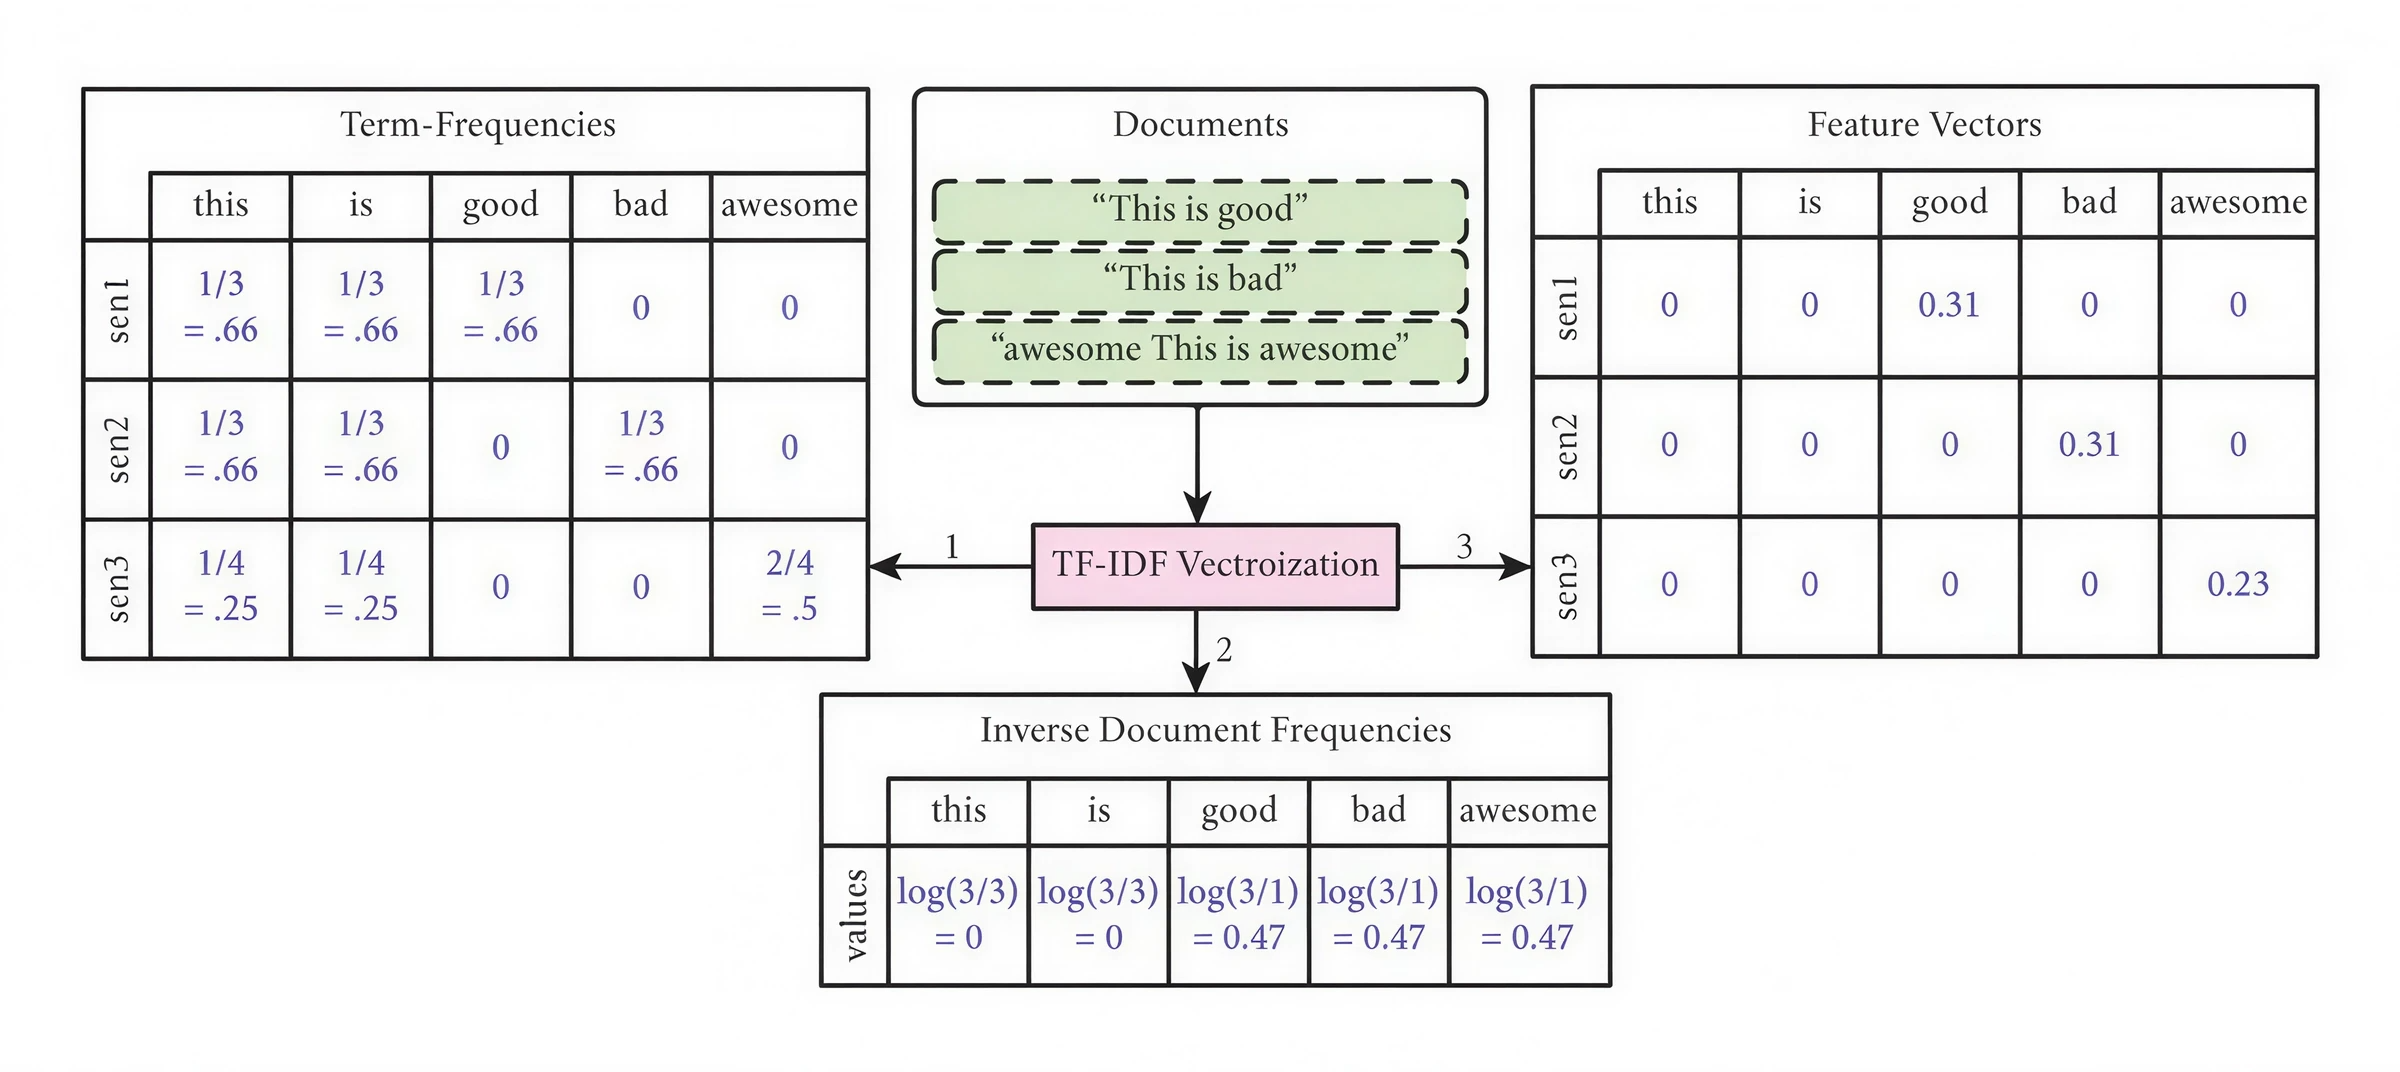

# Konsep TFIDF + LOGISTIC REGRESSION

1. TF-IDF adalah metode untuk mengubah teks menjadi representasi numerik agar dapat diproses oleh model machine learning. Mengukur seberapa sering sebuah kata muncul dalam suatu dokumen:
$$ TF(t, d) = \frac{\text{jumlah kata } t \text{ dalam dokumen } d}{\text{total kata dalam dokumen } d}$$

  - Inverse Document Frequency (IDF)
  Memberikan bobot lebih besar pada kata yang jarang muncul di banyak dokumen, dan bobot kecil pada kata yang muncul di hampir semua dokumen:
  $$
  IDF(t) = \log \frac{N}{df(t)}
  $$
  dengan:
    - $N =$ total jumlah dokumen,
    - $df(t)=$ jumlah dokumen yang mengandung kata $t$.

  - TF-IDF
  Merupakan hasil perkalian antara TF dan IDF:
  $$ TF\text{-}IDF(t, d) = TF(t, d) \times IDF(t)$$
  Intinya: kata-kata yang sering muncul di dokumen tertentu tetapi jarang muncul di dokumen lain akan memiliki nilai TF-IDF yang tinggi.

2. Jika ada $K$ kelas: $y \in \{1, 2, \dots, K\}$, maka probabilitas untuk kelas $k$ adalah:

$$
P(y = k \mid \mathbf{x}) =
\frac{
\exp\big(\beta_{k0} + \beta_{k1} x_1 + \dots + \beta_{kn} x_n\big)
}{
\sum_{j=1}^{K} \exp\big(\beta_{j0} + \beta_{j1} x_1 + \dots + \beta_{jn} x_n\big)
}
$$

  - k banyak kelas yang ada pada label

3. Gabungan TF-IDF + Logistic Regression
- Step 1: teks diubah jadi representasi angka dengan TF-IDF.
- Step 2: vektor angka dari TF-IDF dimasukkan ke Logistic Regression.
- Step 3: Logistic Regression belajar pola kata → kelas.

## Pra-Pemrosesan

> Pra- Pemrosesan

Proses ini dilakukan dalam beberapa tahapan
1. Case Folding
2. Menghilangkan Tautan
3. Menghapus Mention, Hastag, dan Angka
4. Menghapus Karakter spesial

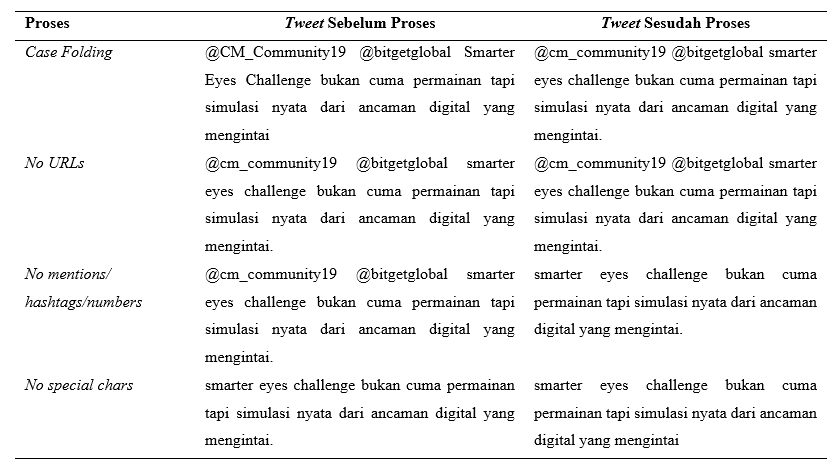

In [ ]:
def preprocess_text_simple(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#|\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df_train_augmented['text_simple'] = df_train_augmented['text'].apply(preprocess_text_simple)
df_test['text_simple'] = df_test['text'].apply(preprocess_text_simple)

> Representasi dengan TF-IDF

$$\text{tfidf}(t,d) =\text{tf}(i,d). log\left(\frac{N}{df(t)}\right)$$

di mana
- $tf(t,d)=$ frekuensi term $t$ pada dokumen $d$.
- $df(t)=$ banyak dokumen yang mengandung term $t$.
- $N=$ jumlag total dokumen.

Hasilnya adalah matriks sparce $X \in \mathbb{R}^{N\times V}$, di mana $V=$ ukuran kosakata.  

In [ ]:
vectorizer_logreg = TfidfVectorizer(ngram_range=(1, 2), min_df=3, max_df=0.9)
X_train_logreg = vectorizer_logreg.fit_transform(df_train_augmented['text_simple'])
y_train_logreg = df_train_augmented['labels'].values
X_test_logreg = vectorizer_logreg.transform(df_test['text_simple'])

> Training Logistic Regression

Untuk input vektor $x \in \mathbb{R}^V$:
$$
P(y=c \mid x) = \frac{\exp\left(w_c^\top x + b_c\right)}{\sum_{j=1}^{C} \exp\left(w_j^\top x + b_j\right)}
$$
dengan:
- $w_c, b_c$ = parameter untuk kelas $c$
- $C$ = jumlah kelas
- Fungsi loss yang digunakan adalah Cross-Entropy Loss:

$$
\mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \, \log P(y=c \mid x_i)
$$

dengan:
- $N$ = jumlah sampel
- $y_{i,c}$ = label asli (one-hot encoding)
- $P(y=c \mid x_i)$ = probabilitas prediksi model

In [ ]:
model_logreg = LogisticRegression(
    class_weight='balanced', C=0.1, random_state=42, max_iter=1000
)
model_logreg.fit(X_train_logreg, y_train_logreg)

test_probs_logreg = model_logreg.predict_proba(X_test_logreg)
print("✅ Prediksi dari TF-IDF + LogReg berhasil didapatkan.")

✅ Prediksi dari TF-IDF + LogReg berhasil didapatkan.


# HYBRID MODEL

Pada tahap akhir, dilakukan proses ensembling hibrida untuk menggabungkan hasil prediksi dari dua model berbeda, yaitu BERT dan Logistic Regression.
Secara matematis, peluang prediksi akhir untuk setiap kelas $c$ dapat ditulis sebagai kombinasi linear berbobot:

$$ P_{\text{final}}(c) = \alpha \cdot P_{\text{BERT}}(c) + \beta \cdot P_{\text{LogReg}}(c) $$

Dalam kasus ini digunakan $\alpha = 0.70$ dan $\beta = 0.30$, sehingga:
$$
P_{\text{final}}(c) = 0.70 \cdot P_{\text{BERT}}(c) + 0.30 \cdot P_{\text{LogReg}}(c)
$$

Selanjutnya, label akhir ditentukan dengan memilih kelas dengan probabilitas terbesar:

$$
\hat{y} = \arg\max_{c} P_{\text{final}}(c)
$$

In [ ]:
print("Menggabungkan Hasil Prediksi Puncak (Ensembling Hibrida)")
bert_weight = 0.70
logreg_weight = 0.30

final_probs = (bert_weight * test_probs_bert) + (logreg_weight * test_probs_logreg)
final_predictions_ids = np.argmax(final_probs, axis=1)
final_labels = [id2label[id] for id in final_predictions_ids]

submission_df = pd.DataFrame({'id': df_test['id'], 'label': final_labels})
submission_df.to_csv('submission_puncak_final_hybrid.csv', index=False)

print("\n File 'submission_puncak_final_hybrid.csv' berhasil dibuat!")
display(submission_df.head())

Menggabungkan Hasil Prediksi Puncak (Ensembling Hibrida)

 File 'submission_puncak_final_hybrid.csv' berhasil dibuat!


,id,label
0,0,reformasi
1,1,sdm
2,2,sdm
3,3,pekerjaan
4,4,reformasi


# -> -> -> VALIDASI MODEL <- <- <-

Untuk mengurangi waktu dalam menjalankan model, kami mengunduh model dan menguploadnya pada drive sehingga model dapat dipanggil sebagai zip lalu di ekstrak. `PENTING UNTUK DIPERHATIKAN` untuk mendapatkan hasil yang konsisten, mulai validasi pada kode dibawah ini dan `Tidak Melewati satupun kode dibawah ini`.

In [ ]:
!pip install -q gdown
import gdown
import zipfile
import os
import pandas as pd

In [ ]:
# https://drive.google.com/file/d/1FlLXXpyd6Ci3jMG7tblf-QjTyd8Zeuma/view?usp=sharing
file_id = '1FlLXXpyd6Ci3jMG7tblf-QjTyd8Zeuma'  # ganti dengan file ID kamu
output_zip = 'drive-download-20250902T132707Z-1-001.zip'

gdown.download(id=file_id, output=output_zip, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1FlLXXpyd6Ci3jMG7tblf-QjTyd8Zeuma
From (redirected): https://drive.google.com/uc?id=1FlLXXpyd6Ci3jMG7tblf-QjTyd8Zeuma&confirm=t&uuid=4bd96144-0b1a-4a94-8a6f-58671e15c44d
To: /content/drive-download-20250902T132707Z-1-001.zip
100%|██████████| 411M/411M [00:06<00:00, 58.8MB/s]


'drive-download-20250902T132707Z-1-001.zip'

In [ ]:
extract_path = 'drive-download-20250902T132707Z-1-001'

with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# Train Clean: https://drive.google.com/uc?export=download&id=1W_OBQIxo0r9a6sZJ6cOLxRc1VvG7BxDy
train_cleaned = pd.read_csv('https://drive.google.com/uc?export=download&id=1W_OBQIxo0r9a6sZJ6cOLxRc1VvG7BxDy')

# Test: https://drive.google.com/file/d/1zpmpdLFmI7dS_jzRSlhIzXTazh4J9zXJ/view?usp=drive_link
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1zpmpdLFmI7dS_jzRSlhIzXTazh4J9zXJ')

In [ ]:
# ==============================================================================
# BAGIAN A: DEFINISI FOCAL LOSS DAN CUSTOM TRAINER
# ==============================================================================
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils.class_weight import compute_class_weight
from transformers import Trainer

# Definisikan Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.5, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, logits, labels):
        ce_loss = F.cross_entropy(logits, labels, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.alpha is not None:
            alpha_t = self.alpha[labels]
            focal_loss = alpha_t * focal_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# Buat Custom Trainer untuk menggunakan Focal Loss
class CustomTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        if class_weights is not None:
            self.class_weights = torch.tensor(class_weights, dtype=torch.float).to(self.args.device)
        else:
            self.class_weights = None

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # Gunakan Focal Loss di sini
        loss_fct = FocalLoss(alpha=self.class_weights, gamma=2.0)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

In [ ]:
# ==============================================================================
# STRATEGI PUNCAK FINAL: HPT + DATA BERSIH + PSEUDO-LABEL + K-FOLD
# ==============================================================================

# 1. Instalasi dan Persiapan Awal
# ------------------------------------------------------------------------------
print("⚙️ Menginstal library...")
!pip install -q transformers datasets accelerate evaluate cleanlab

import pandas as pd
import numpy as np
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import os
import re
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "disabled"

# 2. Muat Aset Terbaik Anda dari Drive
# ------------------------------------------------------------------------------

lokasi_model_guru = "/content/drive-download-20250902T132707Z-1-001"

print(f"\n🔄 Memuat data bersih dan model guru...")
df_train_cleaned = train_cleaned
df_test = test

tokenizer_guru = AutoTokenizer.from_pretrained(lokasi_model_guru)
model_guru = AutoModelForSequenceClassification.from_pretrained(lokasi_model_guru)
trainer_guru = Trainer(model=model_guru)

labels = sorted(df_train_cleaned['label'].unique().tolist())
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}
df_train_cleaned['labels'] = df_train_cleaned['label'].map(label2id)

# 3. Hasilkan Pseudo-Label
# ------------------------------------------------------------------------------
test_dataset = Dataset.from_pandas(df_test)
def tokenize_function(examples):
    return tokenizer_guru(examples["text"], padding="max_length", truncation=True, max_length=128)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True).remove_columns(['text'])

print("🔍 Membuat prediksi untuk menghasilkan pseudo-label...")
raw_predictions = trainer_guru.predict(tokenized_test_dataset)
test_logits = raw_predictions.predictions
probabilities = torch.nn.functional.softmax(torch.from_numpy(test_logits), dim=-1).numpy()
confidence_scores = np.max(probabilities, axis=1)
predicted_class_ids = np.argmax(test_logits, axis=1)

CONFIDENCE_THRESHOLD = 0.90
pseudo_labels_indices = np.where(confidence_scores > CONFIDENCE_THRESHOLD)[0]
pseudo_labels_df = pd.DataFrame({
    'text': df_test.iloc[pseudo_labels_indices]['text'],
    'label': [id2label[id] for id in predicted_class_ids[pseudo_labels_indices]]
})
print(f"✅ Ditemukan {len(pseudo_labels_df)} pseudo-label baru.")

# 4. Buat Dataset Gabungan Final
# ------------------------------------------------------------------------------
print("\n➕ Menggabungkan data bersih dengan pseudo-label...")
df_train_augmented = pd.concat([df_train_cleaned[['text', 'label']], pseudo_labels_df], ignore_index=True)
df_train_augmented['labels'] = df_train_augmented['label'].map(label2id)
print(f"Ukuran dataset latih final: {len(df_train_augmented)} baris.")


# ==============================================================================
# BAGIAN A: TRAINING K-FOLD DENGAN FOCAL LOSS
# ==============================================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils.class_weight import compute_class_weight


# 2. PROSES K-FOLD DENGAN CUSTOM TRAINER
# ------------------------------------------------------------------------------
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
all_test_logits_bert = []
model_name = "indolem/indobertweet-base-uncased"

print(f"\n🚀 Memulai {N_SPLITS}-Fold Cross-Validation pada data gabungan dengan Focal Loss...")
for fold, (train_idx, val_idx) in enumerate(skf.split(df_train_augmented, df_train_augmented['labels'])):
    print(f"\n--- BERT Fold {fold + 1}/{N_SPLITS} ---")
    train_fold_df = df_train_augmented.iloc[train_idx]

    # ✨ 2. HITUNG BOBOT KELAS UNTUK FOLD SAAT INI ✨
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_fold_df['labels']),
        y=train_fold_df['labels'].values
    )

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))
    train_dataset_fold = Dataset.from_pandas(train_fold_df)
    tokenized_train_fold = train_dataset_fold.map(tokenize_function, batched=True).remove_columns(['text', 'label'])

    training_args = TrainingArguments(
        output_dir=f"./hasil_puncak_fold_{fold+1}",
        learning_rate=3.752879110147595e-05,
        num_train_epochs=2,
        per_device_train_batch_size=16,
        weight_decay=0.05612222423783882,
        eval_strategy="no",
        save_strategy="no",
        report_to="none"
    )

    # ✨ 3. GUNAKAN CUSTOM TRAINER, BUKAN TRAINER BIASA ✨
    trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_fold,
        class_weights=class_weights # <-- Berikan bobot ke trainer
    )

    trainer.train()
    test_predictions = trainer.predict(tokenized_test_dataset)
    all_test_logits_bert.append(test_predictions.predictions)

avg_logits_bert = np.mean(all_test_logits_bert, axis=0)
test_probs_bert = torch.nn.functional.softmax(torch.from_numpy(avg_logits_bert), dim=-1).numpy()
print("\n✅ Prediksi dari K-Fold IndoBERTweet (dengan Focal Loss) berhasil didapatkan.")


# ==============================================================================
# BAGIAN B: TRAINING TF-IDF + LOGREG PADA DATA GABUNGAN
# ==============================================================================
print("\n\n--- BAGIAN B: Memulai Training untuk Model TF-IDF + LogReg ---")
def preprocess_text_simple(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#|\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df_train_augmented['text_simple'] = df_train_augmented['text'].apply(preprocess_text_simple)
df_test['text_simple'] = df_test['text'].apply(preprocess_text_simple)

vectorizer_logreg = TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_df=0.9)
X_train_logreg = vectorizer_logreg.fit_transform(df_train_augmented['text_simple'])
y_train_logreg = df_train_augmented['labels'].values
X_test_logreg = vectorizer_logreg.transform(df_test['text_simple'])

model_logreg = LogisticRegression(class_weight='balanced', C=0.1, random_state=42, max_iter=1000)
model_logreg.fit(X_train_logreg, y_train_logreg)
test_probs_logreg = model_logreg.predict_proba(X_test_logreg)
print("✅ Prediksi dari TF-IDF + LogReg berhasil didapatkan.")


# ==============================================================================
# BAGIAN C: BLENDING FINAL DAN SUBMISSION
# ==============================================================================
print("\n\n--- BAGIAN C: Menggabungkan Prediksi dan Membuat Submission ---")
bert_weight = 0.70
logreg_weight = 0.30

final_probs = (bert_weight * test_probs_bert) + (logreg_weight * test_probs_logreg)
final_predictions_ids = np.argmax(final_probs, axis=1)
final_labels = [id2label[id] for id in final_predictions_ids]

submission_df = pd.DataFrame({'id': df_test['id'], 'label': final_labels})
nama_folder = 'submission_puncak_final_hybrid2'
os.makedirs(nama_folder, exist_ok=True) # exist_ok=True agar tidak error jika folder sudah ada
submission_df.to_csv(f'{nama_folder}/8.csv', index=False)

print("\n🎉 File 'submission_puncak_final_hybrid.csv' berhasil dibuat!")
display(submission_df.head())

⚙️ Menginstal library...

🔄 Memuat data bersih dan model guru...


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

🔍 Membuat prediksi untuk menghasilkan pseudo-label...


✅ Ditemukan 3949 pseudo-label baru.

➕ Menggabungkan data bersih dengan pseudo-label...
Ukuran dataset latih final: 7583 baris.

🚀 Memulai 5-Fold Cross-Validation pada data gabungan dengan Focal Loss...

--- BERT Fold 1/5 ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6066 [00:00<?, ? examples/s]

Step,Training Loss
500,0.367500



--- BERT Fold 2/5 ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6066 [00:00<?, ? examples/s]

Step,Training Loss
500,0.354100



--- BERT Fold 3/5 ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6066 [00:00<?, ? examples/s]

Step,Training Loss
500,0.357000



--- BERT Fold 4/5 ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6067 [00:00<?, ? examples/s]

Step,Training Loss
500,0.340700



--- BERT Fold 5/5 ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6067 [00:00<?, ? examples/s]

Step,Training Loss
500,0.354800



✅ Prediksi dari K-Fold IndoBERTweet (dengan Focal Loss) berhasil didapatkan.


--- BAGIAN B: Memulai Training untuk Model TF-IDF + LogReg ---
✅ Prediksi dari TF-IDF + LogReg berhasil didapatkan.


--- BAGIAN C: Menggabungkan Prediksi dan Membuat Submission ---

🎉 File 'submission_puncak_final_hybrid.csv' berhasil dibuat!


,id,label
0,0,reformasi
1,1,sdm
2,2,sdm
3,3,pekerjaan
4,4,reformasi


<Figure size 1000x800 with 0 Axes>

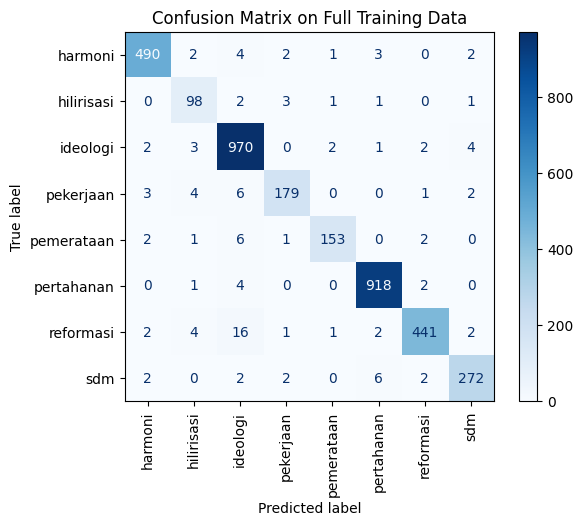

Overall Accuracy: 0.9689

Classification Report:
              precision    recall  f1-score   support

     harmoni       0.98      0.97      0.98       504
  hilirisasi       0.87      0.92      0.89       106
    ideologi       0.96      0.99      0.97       984
   pekerjaan       0.95      0.92      0.93       195
  pemerataan       0.97      0.93      0.95       165
  pertahanan       0.99      0.99      0.99       925
   reformasi       0.98      0.94      0.96       469
         sdm       0.96      0.95      0.96       286

    accuracy                           0.97      3634
   macro avg       0.96      0.95      0.95      3634
weighted avg       0.97      0.97      0.97      3634


Per-Class Accuracy:
harmoni: 0.9722
hilirisasi: 0.9245
ideologi: 0.9858
pekerjaan: 0.9179
pemerataan: 0.9273
pertahanan: 0.9924
reformasi: 0.9403
sdm: 0.9510


<Figure size 1200x600 with 0 Axes>

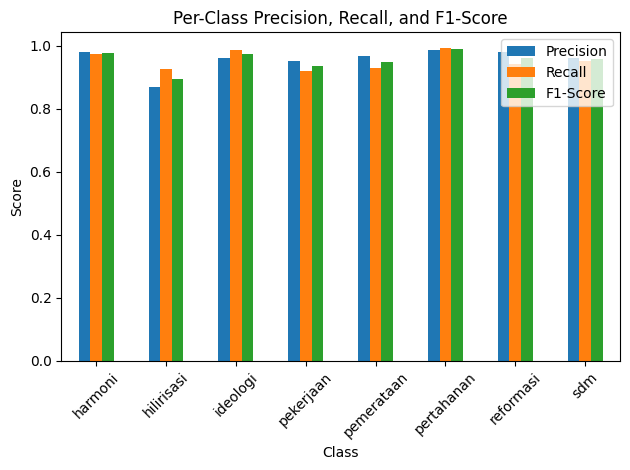

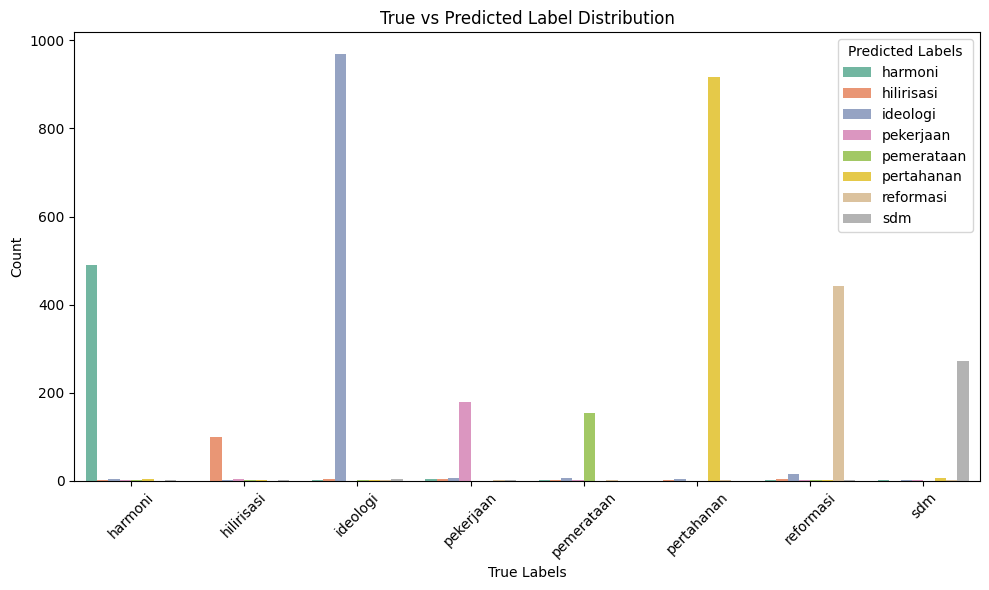

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Generate predictions (as in your code)
raw_predictions_full = trainer_guru.predict(tokenized_train_full)
predicted_labels_full = np.argmax(raw_predictions_full.predictions, axis=1)
true_labels_full = train_cleaned['labels'].values

# Compute confusion matrix
cm = confusion_matrix(true_labels_full, predicted_labels_full)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix on Full Training Data')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(true_labels_full, predicted_labels_full)
print(f"Overall Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(true_labels_full, predicted_labels_full, target_names=labels))

# Per-class accuracy (diagonal of confusion matrix divided by true class counts)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-Class Accuracy:")
for i, label in enumerate(labels):
    print(f"{label}: {per_class_accuracy[i]:.4f}")

# Visualize precision, recall, and F1-score per class
report = classification_report(true_labels_full, predicted_labels_full, target_names=labels, output_dict=True)
metrics_df = pd.DataFrame({
    'Precision': [report[label]['precision'] for label in labels],
    'Recall': [report[label]['recall'] for label in labels],
    'F1-Score': [report[label]['f1-score'] for label in labels]
}, index=labels)

# Plot bar chart for precision, recall, and F1-score
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Per-Class Precision, Recall, and F1-Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Visualize distribution of true vs predicted labels
plt.figure(figsize=(10, 6))
sns.countplot(x=true_labels_full, hue=predicted_labels_full, palette='Set2')
plt.title('True vs Predicted Label Distribution')
plt.xlabel('True Labels')
plt.ylabel('Count')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)
plt.legend(title='Predicted Labels', labels=labels)
plt.tight_layout()
plt.show()

# Rangkuman Proses dan Tantangan yang Diatasi

Notebook ini menyajikan alur kerja komprehensif untuk klasifikasi tweet ke dalam delapan pilar Astacita. Proses dimulai dengan **Data Understanding** untuk memahami karakteristik data Twitter yang tidak terstruktur, mengandung bahasa informal, singkatan, emoji, tautan, dan memiliki distribusi label yang tidak seimbang. Tantangan awal adalah menangani **noise** dan menjaga konteks dalam teks pendek yang sering terpotong.

Tahap **Pra-pemrosesan** yang ekstensif dilakukan untuk mengatasi tantangan ini. Langkah-langkah seperti penghapusan mention, hashtag, dan tautan dilakukan untuk mengurangi bias dan noise. Strategi penanganan teks terpotong diimplementasikan untuk menjaga kelengkapan kalimat yang penting. Case folding, stemming dengan Sastrawi, dan penghapusan spasi ganda menyeragamkan teks, diikuti dengan normalisasi ejaan menggunakan Indo-Normalizer untuk menangani slang, alay, dan typo. Penggunaan stopword removal, baik manual maupun otomatis, memerlukan kehati-hatian agar tidak menghilangkan informasi penting, terutama untuk model berbasis hitungan.

**Eksplorasi Data (EDA)** memvisualisasikan distribusi label yang tidak seimbang, pola panjang teks, dan kata-kata yang sering muncul per kelas. Analisis ini mengkonfirmasi perlunya strategi pemodelan yang robust terhadap imbalansi kelas.

Dalam **Perencanaan Modelling**, strategi hibrida dipilih untuk menggabungkan kekuatan representasi kontekstual (BERT) dan representasi berbasis hitungan (TF-IDF). Tantangannya adalah menangkap baik isyarat leksikal yang deterministik maupun makna semantik yang implisit dalam teks singkat.

Untuk meningkatkan kualitas data latih, teknik **Confidence Learning dengan Cleanlab** diimplementasikan. Ini melibatkan pelatihan model guru dengan data awal, menghasilkan prediksi out-of-fold (OOF), dan menggunakan Cleanlab untuk mengidentifikasi dan menghapus data dengan potensi label yang salah. Ini adalah langkah krusial untuk mengurangi dampak data noise.

Untuk mengatasi imbalansi kelas, **Focal Loss** diintegrasikan ke dalam proses pelatihan model BERT. Focal Loss secara matematis memberikan bobot lebih pada sampel yang sulit diklasifikasikan dan kelas minoritas, membantu model belajar lebih efektif pada distribusi data yang tidak merata.

**Pseudo-Labelling** diterapkan untuk memperluas data latih. Model guru yang dilatih pada data bersih digunakan untuk memprediksi label pada data uji yang tidak berlabel. Pseudo-label dengan confidence tinggi kemudian ditambahkan ke dataset latih bersih untuk menciptakan dataset augmented. Ini membantu model generalisasi lebih baik dengan memanfaatkan informasi dari data tidak berlabel.

Proses pelatihan final menggunakan **K-Fold Cross-Validation** dengan dataset augmented. Model BERT dilatih pada 5 fold, dan prediksi pada data uji dirata-ratakan.

Secara paralel, model berbasis **Case Matching (TF-IDF + Logistic Regression)** dilatih pada dataset augmented dengan pra-pemrosesan yang lebih sederhana (case folding, penghapusan tautan, mention, hashtag, angka, dan karakter spesial). Logistic Regression dengan `class_weight='balanced'` digunakan untuk menangani imbalansi kelas.

Terakhir, **Hybrid Model** menggabungkan prediksi probabilitas dari model BERT (dengan bobot 0.70) dan Logistic Regression (dengan bobot 0.30). Ensemble ini memanfaatkan kekuatan kedua pendekatan: kemampuan BERT dalam menangkap semantik kompleks dan efisiensi TF-IDF+LogReg dalam menangkap isyarat leksikal. Prediksi akhir didapatkan dengan memilih kelas dengan probabilitas gabungan tertinggi.

Secara keseluruhan, notebook ini berhasil mengatasi tantangan klasifikasi teks pada data sosial media yang noisy dan tidak seimbang melalui kombinasi pra-pemrosesan yang cermat, pembersihan label dengan Cleanlab, penggunaan Focal Loss untuk imbalansi kelas, pseudo-labelling untuk augmentasi data, K-Fold Cross-Validation untuk robustnes, dan ensembling hibrida dari model BERT dan TF-IDF+LogReg.

In [ ]:
# ==============================================================================
# # STRATEGI PUNCAK FINAL: HPT + DATA BERSIH + PSEUDO-LABEL + K-FOLD
# # ==============================================================================

# # 1. Instalasi dan Persiapan Awal
# # ------------------------------------------------------------------------------
# print("⚙️ Menginstal library...")
# !pip install -q transformers datasets accelerate evaluate cleanlab

# import pandas as pd
# import numpy as np
# from datasets import Dataset
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import balanced_accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_extraction.text import TfidfVectorizer
# import torch
# import os
# import re
# import os
# os.environ["WANDB_DISABLED"] = "true"
# os.environ["WANDB_MODE"] = "disabled"

# # 2. Muat Aset Terbaik Anda dari Drive
# # ------------------------------------------------------------------------------

# lokasi_model_guru = "/content/drive-download-20250902T132707Z-1-001"

# print(f"\n🔄 Memuat data bersih dan model guru...")
# df_train_cleaned = train_cleaned
# df_test = test

# tokenizer_guru = AutoTokenizer.from_pretrained(lokasi_model_guru)
# model_guru = AutoModelForSequenceClassification.from_pretrained(lokasi_model_guru)
# trainer_guru = Trainer(model=model_guru)

# labels = sorted(df_train_cleaned['label'].unique().tolist())
# label2id = {label: i for i, label in enumerate(labels)}
# id2label = {i: label for i, label in enumerate(labels)}
# df_train_cleaned['labels'] = df_train_cleaned['label'].map(label2id)

# # 3. Hasilkan Pseudo-Label
# # ------------------------------------------------------------------------------
# test_dataset = Dataset.from_pandas(df_test)
# def tokenize_function(examples):
#     return tokenizer_guru(examples["text"], padding="max_length", truncation=True, max_length=128)
# tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True).remove_columns(['text'])

# print("🔍 Membuat prediksi untuk menghasilkan pseudo-label...")
# raw_predictions = trainer_guru.predict(tokenized_test_dataset)
# test_logits = raw_predictions.predictions
# probabilities = torch.nn.functional.softmax(torch.from_numpy(test_logits), dim=-1).numpy()
# confidence_scores = np.max(probabilities, axis=1)
# predicted_class_ids = np.argmax(test_logits, axis=1)

# CONFIDENCE_THRESHOLD = 0.90
# pseudo_labels_indices = np.where(confidence_scores > CONFIDENCE_THRESHOLD)[0]
# pseudo_labels_df = pd.DataFrame({
#     'text': df_test.iloc[pseudo_labels_indices]['text'],
#     'label': [id2label[id] for id in predicted_class_ids[pseudo_labels_indices]]
# })
# print(f"✅ Ditemukan {len(pseudo_labels_df)} pseudo-label baru.")

# # 4. Buat Dataset Gabungan Final
# # ------------------------------------------------------------------------------
# print("\n➕ Menggabungkan data bersih dengan pseudo-label...")
# df_train_augmented = pd.concat([df_train_cleaned[['text', 'label']], pseudo_labels_df], ignore_index=True)
# df_train_augmented['labels'] = df_train_augmented['label'].map(label2id)
# print(f"Ukuran dataset latih final: {len(df_train_augmented)} baris.")


# # ==============================================================================
# # BAGIAN A: TRAINING K-FOLD DENGAN FOCAL LOSS
# # ==============================================================================
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from sklearn.utils.class_weight import compute_class_weight


# # 2. PROSES K-FOLD DENGAN CUSTOM TRAINER
# # ------------------------------------------------------------------------------
# N_SPLITS = 5
# skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
# all_test_logits_bert = []
# model_name = "indolem/indobertweet-base-uncased"

# print(f"\n🚀 Memulai {N_SPLITS}-Fold Cross-Validation pada data gabungan dengan Focal Loss...")
# for fold, (train_idx, val_idx) in enumerate(skf.split(df_train_augmented, df_train_augmented['labels'])):
#     print(f"\n--- BERT Fold {fold + 1}/{N_SPLITS} ---")
#     train_fold_df = df_train_augmented.iloc[train_idx]

#     # ✨ 2. HITUNG BOBOT KELAS UNTUK FOLD SAAT INI ✨
#     class_weights = compute_class_weight(
#         class_weight='balanced',
#         classes=np.unique(train_fold_df['labels']),
#         y=train_fold_df['labels'].values
#     )

#     model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))
#     train_dataset_fold = Dataset.from_pandas(train_fold_df)
#     tokenized_train_fold = train_dataset_fold.map(tokenize_function, batched=True).remove_columns(['text', 'label'])

#     training_args = TrainingArguments(
#         output_dir=f"./hasil_puncak_fold_{fold+1}",
#         learning_rate=3.752879110147595e-05,
#         num_train_epochs=2,
#         per_device_train_batch_size=16,
#         weight_decay=0.05612222423783882,
#         eval_strategy="no",
#         save_strategy="no",
#         report_to="none"
#     )

#     # ✨ 3. GUNAKAN CUSTOM TRAINER, BUKAN TRAINER BIASA ✨
#     trainer = CustomTrainer(
#         model=model,
#         args=training_args,
#         train_dataset=tokenized_train_fold,
#         class_weights=class_weights # <-- Berikan bobot ke trainer
#     )

#     trainer.train()
#     test_predictions = trainer.predict(tokenized_test_dataset)
#     all_test_logits_bert.append(test_predictions.predictions)

# avg_logits_bert = np.mean(all_test_logits_bert, axis=0)
# test_probs_bert = torch.nn.functional.softmax(torch.from_numpy(avg_logits_bert), dim=-1).numpy()
# print("\n✅ Prediksi dari K-Fold IndoBERTweet (dengan Focal Loss) berhasil didapatkan.")


# # ==============================================================================
# # BAGIAN B: TRAINING TF-IDF + LOGREG PADA DATA GABUNGAN
# # ==============================================================================
# print("\n\n--- BAGIAN B: Memulai Training untuk Model TF-IDF + LogReg ---")
# def preprocess_text_simple(text):
#     text = text.lower()
#     text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
#     text = re.sub(r'\@\w+|\#|\d+', '', text)
#     text = re.sub(r'[^\w\s]', '', text)
#     return text

# df_train_augmented['text_simple'] = df_train_augmented['text'].apply(preprocess_text_simple)
# df_test['text_simple'] = df_test['text'].apply(preprocess_text_simple)

# vectorizer_logreg = TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_df=0.9)
# X_train_logreg = vectorizer_logreg.fit_transform(df_train_augmented['text_simple'])
# y_train_logreg = df_train_augmented['labels'].values
# X_test_logreg = vectorizer_logreg.transform(df_test['text_simple'])

# model_logreg = LogisticRegression(class_weight='balanced', C=1, random_state=42, max_iter=1000)
# model_logreg.fit(X_train_logreg, y_train_logreg)
# test_probs_logreg = model_logreg.predict_proba(X_test_logreg)
# print("✅ Prediksi dari TF-IDF + LogReg berhasil didapatkan.")


# # ==============================================================================
# # BAGIAN C: BLENDING FINAL DAN SUBMISSION
# # ==============================================================================
# print("\n\n--- BAGIAN C: Menggabungkan Prediksi dan Membuat Submission ---")
# bert_weight = 0.70
# logreg_weight = 0.30

# final_probs = (bert_weight * test_probs_bert) + (logreg_weight * test_probs_logreg)
# final_predictions_ids = np.argmax(final_probs, axis=1)
# final_labels = [id2label[id] for id in final_predictions_ids]

# submission_df = pd.DataFrame({'id': df_test['id'], 'label': final_labels})
# nama_folder = 'submission_puncak_final_hybrid2'
# os.makedirs(nama_folder, exist_ok=True) # exist_ok=True agar tidak error jika folder sudah ada
# submission_df.to_csv(f'{nama_folder}/8.csv', index=False)

# print("\n🎉 File 'submission_puncak_final_hybrid.csv' berhasil dibuat!")
# display(submission_df.head())